#Introduction

Video game popularity has exploded in recent years and has become so entwined with pop-culture today that it’s impact on society is hard to ignore. As an avid video game player, I wanted to take a deep-dive into the industry to uncover interesting trends and insights.
My project looks at the video game industry over the last few decades focusing on 3 main areas:

1. Video game publishers
Who are the biggest publishers, what games have they made and how have they performed?

2. Video game titles
What have been the best games overall and per year, what genres have dominated and which regions have performed best?

3. Consoles
Which consoles have been the most popular and which publishers have catered for which platform?

I also looked at ratings data as well as streaming data from Twitch (a popular streaming website) to see if rating or streaming trends correlated to any of the insights I uncovered from these 3 categories.






Before we begin with any analysis, we need to import and clean our data.

#Importing libraries and datasets

##Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import csv
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import shapiro, mannwhitneyu, spearmanr, kruskal
from scipy.stats import spearmanr

##Datasets

I found multiple datasets and the info I wanted was spread amongst them. I imported them all into my notebook and merged the ones that had overlapping info.

In [88]:
!kaggle datasets download -d patkle/video-game-sales-data-from-vgchartzcom

Dataset URL: https://www.kaggle.com/datasets/patkle/video-game-sales-data-from-vgchartzcom
License(s): other
video-game-sales-data-from-vgchartzcom.zip: Skipping, found more recently modified local copy (use --force to force download)


In [89]:
!unzip video-game-sales-data-from-vgchartzcom.zip

Archive:  video-game-sales-data-from-vgchartzcom.zip
replace game_statistics_feb_2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: game_statistics_feb_2023.csv  


In [90]:
game_sales = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/vgsales.csv.zip')
game_sales.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0        41        29         4            8            83  
1        29         4         7            1            40  
2        16        13         4            3            36  
3        16        11         3            3            33  
4        11         9        10            1            31

In [91]:
game_stats = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/game_statistics_feb_2023.csv')

<ipython-input-91-f96a18efc903>:1: DtypeWarning: Columns (1,2,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  game_stats = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/game_statistics_feb_2023.csv')


In [92]:
game_stats = pd.merge(game_stats, game_sales, left_on='title', right_on ='Name',how='left')
game_stats.head()

title total_sales total_shipped        publisher  \
0             Professor Layton         NaN        18.00m         Nintendo   
1  Need for Speed: Most Wanted         NaN        17.80m  Electronic Arts   
2  Need for Speed: Most Wanted         NaN        17.80m  Electronic Arts   
3  Need for Speed: Most Wanted         NaN        17.80m  Electronic Arts   
4  Need for Speed: Most Wanted         NaN        17.80m  Electronic Arts   

   developer release_date platform japan_sales na_sales other_sales pal_sales  \
0    Level-5  10th Feb 08   Series         NaN      NaN         NaN       NaN   
1  EA Canada  15th Nov 05      All         NaN      NaN         NaN       NaN   
2  EA Canada  15th Nov 05      All         NaN      NaN         NaN       NaN   
3  EA Canada  15th Nov 05      All         NaN      NaN         NaN       NaN   
4  EA Canada  15th Nov 05      All         NaN      NaN         NaN       NaN   

   pos  user_score  vgchartz_score  critic_score  last_update  Rank  \
0  201         NaN             NaN           NaN  04th Feb 20   NaN   
1  202         NaN             NaN           NaN  20th Oct 20   253   
2  202         NaN             NaN           NaN  20th Oct 20   499   
3  202         NaN             NaN           NaN  20th Oct 20  1175   
4  202         NaN             NaN           NaN  20th Oct 20  1532   

                          Name Platform  Year   Genre        Publisher  \
0                          NaN      NaN   NaN     NaN              NaN   
1  Need for Speed: Most Wanted      PS2  2005  Racing  Electronic Arts   
2  Need for Speed: Most Wanted      PS3  2012  Racing  Electronic Arts   
3  Need for Speed: Most Wanted     X360  2012  Racing  Electronic Arts   
4  Need for Speed: Most Wanted     X360  2005  Racing  Electronic Arts   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0       NaN       NaN       NaN          NaN           NaN  
1         2         2         0            0             4  
2         1         2         0            1             3  
3         1         1         0            0             2  
4         1         0         0            0             1

In [93]:
df_2023 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (1).csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (2).csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (3).csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (4).csv')
df_2018 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (5).csv')
df_2017 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (6).csv')
df_2016 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (7).csv')

df_2023['Year'] = 2023
df_2022['Year'] = 2022
df_2021['Year'] = 2021
df_2020['Year'] = 2020
df_2019['Year'] = 2019
df_2018['Year'] = 2018
df_2017['Year'] = 2017
df_2016['Year'] = 2016

In [94]:
stream_data = pd.concat([df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016])

In [95]:
!kaggle datasets download -d henrylin03/metacritic-games-user-reviews-and-metascores

Dataset URL: https://www.kaggle.com/datasets/henrylin03/metacritic-games-user-reviews-and-metascores
License(s): copyright-authors
metacritic-games-user-reviews-and-metascores.zip: Skipping, found more recently modified local copy (use --force to force download)


In [96]:
!unzip metacritic-games-user-reviews-and-metascores.zip

Archive:  metacritic-games-user-reviews-and-metascores.zip
replace games.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: games.csv               


In [97]:
meta_reviews = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/games.csv')
meta_reviews.head()

name platform       release_date  \
0                            ! SPACE ACCIDENT !       PC  February 10, 2022   
1  ! That Bastard Is Trying To Steal Our Gold !       PC       May 11, 2014   
2                                    !4RC4N01D!       PC   January 12, 2018   
3                   !4RC4N01D! 2: Retro Edition       PC   February 6, 2018   
4                      !4RC4N01D! 3: Cold Space       PC      March 8, 2018   

                                             summary metascore userscore  
0  The year is 2119. A turning point has begun in...       tbd       tbd  
1  It's a fun puzzle game where you need to steal...       tbd       3.4  
2  Hardcore arkanoid in the spirit of old games f...       tbd       4.0  
3  Everyone dreams of returning 2007, but no one ...       tbd       3.8  
4  !4RC4N01D! returns! This time we have an accid...       tbd       3.0

In [98]:
game_rank = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/game_titles.csv', delimiter=',')
game_rank.head()

ID                                     Name  Release Year  User Rating  \
0  173172       Outer Wilds: Archaeologist Edition          1970          100   
1   20196  Metal Gear Solid: The Legacy Collection          1970          100   
2    5010                      MLB Power Pros 2008          1970          100   
3    4095                                   Scaler          1970           99   
4  212264                Fuga: Melodies of Steel 2          1970           99   

   Num of Ratings  Critic Rating  Num of Critic Ratings  
0               9             85                      2  
1              38             87                      3  
2              10             71                      4  
3              10             60                      2  
4               6             85                      2

In [99]:
game_rank = pd.merge(game_rank, meta_reviews, left_on='Name', right_on ='name',how='left')
game_rank.head()

ID                                     Name  Release Year  User Rating  \
0  173172       Outer Wilds: Archaeologist Edition          1970          100   
1   20196  Metal Gear Solid: The Legacy Collection          1970          100   
2    5010                      MLB Power Pros 2008          1970          100   
3    5010                      MLB Power Pros 2008          1970          100   
4    5010                      MLB Power Pros 2008          1970          100   

   Num of Ratings  Critic Rating  Num of Critic Ratings  \
0               9             85                      2   
1              38             87                      3   
2              10             71                      4   
3              10             71                      4   
4              10             71                      4   

                                      name       platform     release_date  \
0                                      NaN            NaN              NaN   
1  Metal Gear Solid: The Legacy Collection  PlayStation 3     July 9, 2013   
2                      MLB Power Pros 2008  PlayStation 2    July 29, 2008   
3                      MLB Power Pros 2008             DS  August 25, 2008   
4                      MLB Power Pros 2008            Wii    July 29, 2008   

                                             summary metascore userscore  
0                                                NaN       NaN       NaN  
1  Celebrating the 25th anniversary of the METAL ...        93       9.0  
2  With over ten different exciting game modes in...        67       8.5  
3  With over ten different exciting game modes in...        70       tbd  
4  With over ten different exciting game modes in...        79       8.9

In [100]:
game_stats.head()

title total_sales total_shipped        publisher  \
0             Professor Layton         NaN        18.00m         Nintendo   
1  Need for Speed: Most Wanted         NaN        17.80m  Electronic Arts   
2  Need for Speed: Most Wanted         NaN        17.80m  Electronic Arts   
3  Need for Speed: Most Wanted         NaN        17.80m  Electronic Arts   
4  Need for Speed: Most Wanted         NaN        17.80m  Electronic Arts   

   developer release_date platform japan_sales na_sales other_sales pal_sales  \
0    Level-5  10th Feb 08   Series         NaN      NaN         NaN       NaN   
1  EA Canada  15th Nov 05      All         NaN      NaN         NaN       NaN   
2  EA Canada  15th Nov 05      All         NaN      NaN         NaN       NaN   
3  EA Canada  15th Nov 05      All         NaN      NaN         NaN       NaN   
4  EA Canada  15th Nov 05      All         NaN      NaN         NaN       NaN   

   pos  user_score  vgchartz_score  critic_score  last_update  Rank  \
0  201         NaN             NaN           NaN  04th Feb 20   NaN   
1  202         NaN             NaN           NaN  20th Oct 20   253   
2  202         NaN             NaN           NaN  20th Oct 20   499   
3  202         NaN             NaN           NaN  20th Oct 20  1175   
4  202         NaN             NaN           NaN  20th Oct 20  1532   

                          Name Platform  Year   Genre        Publisher  \
0                          NaN      NaN   NaN     NaN              NaN   
1  Need for Speed: Most Wanted      PS2  2005  Racing  Electronic Arts   
2  Need for Speed: Most Wanted      PS3  2012  Racing  Electronic Arts   
3  Need for Speed: Most Wanted     X360  2012  Racing  Electronic Arts   
4  Need for Speed: Most Wanted     X360  2005  Racing  Electronic Arts   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0       NaN       NaN       NaN          NaN           NaN  
1         2         2         0            0             4  
2         1         2         0            1             3  
3         1         1         0            0             2  
4         1         0         0            0             1

In [101]:
stream_data.head()

Unnamed: 0  Unnamed: 1                Game  Watch time (mins)  \
0           1         NaN       Just Chatting       186057846660   
1           2         NaN  Grand Theft Auto V        80078621460   
2           3         NaN   League of Legends        79363308780   
3           4         NaN            VALORANT        59292102840   
4           5         NaN      Counter-Strike        41175237300   

   Stream time (mins)  Peak viewers  Peak channels  Streamers  \
0          2176264920       1183419           8310    2319716   
1          1470086040        528554           5377    1480243   
2          1537277100       2597522           6356     938141   
3          2398618140       1196352           9350    1587006   
4           697160220       1117445           4016     864073   

   Average viewers  Average channels  Average viewer ratio  Unnamed: 11  Year  
0           354031              4141                    85          NaN  2023  
1           152373              2797                    54          NaN  2023  
2           151012              2925                    52          NaN  2023  
3           112821              4564                    25          NaN  2023  
4            78348              1326                    59          NaN  2023

In [102]:
game_rank.head()

ID                                     Name  Release Year  User Rating  \
0  173172       Outer Wilds: Archaeologist Edition          1970          100   
1   20196  Metal Gear Solid: The Legacy Collection          1970          100   
2    5010                      MLB Power Pros 2008          1970          100   
3    5010                      MLB Power Pros 2008          1970          100   
4    5010                      MLB Power Pros 2008          1970          100   

   Num of Ratings  Critic Rating  Num of Critic Ratings  \
0               9             85                      2   
1              38             87                      3   
2              10             71                      4   
3              10             71                      4   
4              10             71                      4   

                                      name       platform     release_date  \
0                                      NaN            NaN              NaN   
1  Metal Gear Solid: The Legacy Collection  PlayStation 3     July 9, 2013   
2                      MLB Power Pros 2008  PlayStation 2    July 29, 2008   
3                      MLB Power Pros 2008             DS  August 25, 2008   
4                      MLB Power Pros 2008            Wii    July 29, 2008   

                                             summary metascore userscore  
0                                                NaN       NaN       NaN  
1  Celebrating the 25th anniversary of the METAL ...        93       9.0  
2  With over ten different exciting game modes in...        67       8.5  
3  With over ten different exciting game modes in...        70       tbd  
4  With over ten different exciting game modes in...        79       8.9

#Preprocessing the data

Here we will make sure the data is clean and accurate. This means dealing with null values, making sure data is in the correct format, removing unwanted/uneeded columns etc.

##Game stats


In [103]:
game_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84955 entries, 0 to 84954
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           84955 non-null  object 
 1   total_sales     36066 non-null  object 
 2   total_shipped   6044 non-null   object 
 3   publisher       84955 non-null  object 
 4   developer       84938 non-null  object 
 5   release_date    79057 non-null  object 
 6   platform        84955 non-null  object 
 7   japan_sales     10173 non-null  object 
 8   na_sales        27887 non-null  object 
 9   other_sales     31771 non-null  object 
 10  pal_sales       28294 non-null  object 
 11  pos             84955 non-null  int64  
 12  user_score      583 non-null    float64
 13  vgchartz_score  3329 non-null   float64
 14  critic_score    13160 non-null  float64
 15  last_update     22028 non-null  object 
 16  Rank            44143 non-null  float64
 17  Name            44143 non-null 

In [104]:
print (f'Number of rows: {len(game_stats)}')

game_stats.isna().sum()

Number of rows: 84955


title                 0
total_sales       48889
total_shipped     78911
publisher             0
developer            17
release_date       5898
platform              0
japan_sales       74782
na_sales          57068
other_sales       53184
pal_sales         56661
pos                   0
user_score        84372
vgchartz_score    81626
critic_score      71795
last_update       62927
Rank              40812
Name              40812
Platform          40812
Year              41618
Genre             40812
Publisher         40894
NA_Sales          40812
EU_Sales          40812
JP_Sales          40812
Other_Sales       40812
Global_Sales      40812
dtype: int64

Looking at the data types in the game_stats dataframe. release date is the only column that needs converting from an object to datetime.

After joining the two dataframes there were many duplicate columns as well as empty columns.

I dropped columns with too much missing info as well as any duplicate columns that were redundant.

I dropped only the missing rows in developer and release date.

In [105]:
game_stats['release_date'] = pd.to_datetime(game_stats['release_date'])
game_stats.dropna(subset=['release_date'], inplace=True)
game_stats = game_stats.drop(['total_sales','Rank', 'total_shipped','developer','pos','japan_sales', 'na_sales', 'other_sales', 'pal_sales', 'user_score', 'vgchartz_score', 'critic_score', 'last_update','Name','Publisher'], axis=1)
game_stats.drop(['Year'],axis=1,inplace=True)
game_stats.drop(['platform'], axis=1, inplace=True)



<ipython-input-105-f86a5ababe18>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  game_stats['release_date'] = pd.to_datetime(game_stats['release_date'])


In [106]:
game_stats = game_stats[game_stats.publisher != 'Sony Computer Entertainment']
game_stats = game_stats[~((game_stats['title'] == 'Tetris') & (game_stats['publisher'] != 'Nintendo'))]

Lastly I wanted to check for durplicates from joining the two dataframes and remove if neccesary.

In [107]:
duplicate_rows = game_stats[game_stats.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")


if len(duplicate_rows) > 0:
  game_stats.drop_duplicates(inplace=True)
  print("Duplicate rows dropped.")

Number of duplicate rows: 19722
Duplicate rows dropped.


##Game rank

In [108]:
game_rank.head()

ID                                     Name  Release Year  User Rating  \
0  173172       Outer Wilds: Archaeologist Edition          1970          100   
1   20196  Metal Gear Solid: The Legacy Collection          1970          100   
2    5010                      MLB Power Pros 2008          1970          100   
3    5010                      MLB Power Pros 2008          1970          100   
4    5010                      MLB Power Pros 2008          1970          100   

   Num of Ratings  Critic Rating  Num of Critic Ratings  \
0               9             85                      2   
1              38             87                      3   
2              10             71                      4   
3              10             71                      4   
4              10             71                      4   

                                      name       platform     release_date  \
0                                      NaN            NaN              NaN   
1  Metal Gear Solid: The Legacy Collection  PlayStation 3     July 9, 2013   
2                      MLB Power Pros 2008  PlayStation 2    July 29, 2008   
3                      MLB Power Pros 2008             DS  August 25, 2008   
4                      MLB Power Pros 2008            Wii    July 29, 2008   

                                             summary metascore userscore  
0                                                NaN       NaN       NaN  
1  Celebrating the 25th anniversary of the METAL ...        93       9.0  
2  With over ten different exciting game modes in...        67       8.5  
3  With over ten different exciting game modes in...        70       tbd  
4  With over ten different exciting game modes in...        79       8.9

In [109]:
game_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22627 entries, 0 to 22626
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22627 non-null  int64  
 1   Name                   22627 non-null  object 
 2   Release Year           22622 non-null  float64
 3   User Rating            22627 non-null  float64
 4   Num of Ratings         22627 non-null  int64  
 5   Critic Rating          22627 non-null  float64
 6   Num of Critic Ratings  22627 non-null  int64  
 7   name                   20840 non-null  object 
 8   platform               20840 non-null  object 
 9   release_date           20840 non-null  object 
 10  summary                20561 non-null  object 
 11  metascore              20840 non-null  object 
 12  userscore              20840 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 2.2+ MB


In [110]:
print(len(game_rank))
game_rank.isna().sum()

22627


ID                          0
Name                        0
Release Year                5
User Rating                 0
Num of Ratings              0
Critic Rating               0
Num of Critic Ratings       0
name                     1787
platform                 1787
release_date             1787
summary                  2066
metascore                1787
userscore                1787
dtype: int64

We have quite a few columns in the wrong datatype so we'll fix that.

I dropped duplicate columns and redundant columns from the merge.

Lastly I imputed the missing values for metascore and userscore.

In [111]:
#Converting data types
game_rank['Num of Ratings'] = pd.to_numeric(game_rank['Num of Ratings'], errors='coerce')
game_rank['Num of Critic Ratings'] = pd.to_numeric(game_rank['Num of Critic Ratings'], errors='coerce')
game_rank['release_date'] = pd.to_datetime(game_rank['release_date'])
game_rank['metascore'] = pd.to_numeric(game_rank['metascore'], errors='coerce')
game_rank['userscore']= pd.to_numeric(game_rank['userscore'], errors='coerce')*10

#These are duplicate rows so they were not needed
game_rank.drop(columns=['name','platform','Release Year', 'ID'], inplace=True)

#Since there were many missing ratings in metascore and userscore, I decided not to drop them and impute them using the mean instead.
game_rank['metascore'].fillna(game_rank['metascore'].mean(), inplace=True)
game_rank['userscore'].fillna(game_rank['userscore'].mean(), inplace=True)

##Stream data

In [112]:
stream_data.head()

Unnamed: 0  Unnamed: 1                Game  Watch time (mins)  \
0           1         NaN       Just Chatting       186057846660   
1           2         NaN  Grand Theft Auto V        80078621460   
2           3         NaN   League of Legends        79363308780   
3           4         NaN            VALORANT        59292102840   
4           5         NaN      Counter-Strike        41175237300   

   Stream time (mins)  Peak viewers  Peak channels  Streamers  \
0          2176264920       1183419           8310    2319716   
1          1470086040        528554           5377    1480243   
2          1537277100       2597522           6356     938141   
3          2398618140       1196352           9350    1587006   
4           697160220       1117445           4016     864073   

   Average viewers  Average channels  Average viewer ratio  Unnamed: 11  Year  
0           354031              4141                    85          NaN  2023  
1           152373              2797                    54          NaN  2023  
2           151012              2925                    52          NaN  2023  
3           112821              4564                    25          NaN  2023  
4            78348              1326                    59          NaN  2023

In [113]:
stream_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            400 non-null    int64  
 1   Unnamed: 1            0 non-null      float64
 2   Game                  400 non-null    object 
 3   Watch time (mins)     400 non-null    int64  
 4   Stream time (mins)    400 non-null    int64  
 5   Peak viewers          400 non-null    int64  
 6   Peak channels         400 non-null    int64  
 7   Streamers             400 non-null    int64  
 8   Average viewers       400 non-null    int64  
 9   Average channels      400 non-null    int64  
 10  Average viewer ratio  400 non-null    float64
 11  Unnamed: 11           0 non-null      float64
 12  Year                  400 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 43.8+ KB


In [114]:
stream_data.isna().sum()

Unnamed: 0                0
Unnamed: 1              400
Game                      0
Watch time (mins)         0
Stream time (mins)        0
Peak viewers              0
Peak channels             0
Streamers                 0
Average viewers           0
Average channels          0
Average viewer ratio      0
Unnamed: 11             400
Year                      0
dtype: int64

In [115]:
#Dropping uneeded columns
stream_data.drop(columns=['Unnamed: 0','Unnamed: 1', 'Unnamed: 11'], inplace=True)

#Converting data types
stream_data['Year'] = pd.to_datetime(stream_data['Year'], format='%Y')
stream_data['Average viewer ratio'] = pd.to_numeric(stream_data['Average viewer ratio'], errors='coerce')

#Renaming and reformatting data
stream_data['Watch time (mins)']= stream_data['Watch time (mins)']/60
stream_data.rename(columns={'Watch time (mins)':'Watch time (hrs)'}, inplace=True)
stream_data['Stream time (mins)']= stream_data['Stream time (mins)']/60
stream_data.rename(columns={'Stream time (mins)':'Stream time (hrs)'}, inplace=True)

#removing just chatting category since it is not a game
stream_data = stream_data[stream_data['Game'] != 'Just Chatting']

##Merged Dataframe

In [148]:
temp_df = pd.merge(stream_data,game_stats, left_on='Game', right_on='title', how='left')
merged_df = pd.merge(temp_df, game_rank, left_on='Game', right_on='Name',how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833 entries, 0 to 3832
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Game                      3833 non-null   object        
 1   Watch time (hrs)          3833 non-null   float64       
 2   Stream time (hrs)         3833 non-null   float64       
 3   Peak viewers              3833 non-null   int64         
 4   Peak channels             3833 non-null   int64         
 5   Streamers                 3833 non-null   int64         
 6   Average viewers           3833 non-null   int64         
 7   Average channels          3833 non-null   int64         
 8   Average viewer ratio      3833 non-null   float64       
 9   Year                      3833 non-null   int32         
 10  Watch time_standardized   3833 non-null   float64       
 11  Stream time_standardized  3833 non-null   float64       
 12  title               

In [149]:
merged_df.isna().sum()

Game                          0
Watch time (hrs)              0
Stream time (hrs)             0
Peak viewers                  0
Peak channels                 0
Streamers                     0
Average viewers               0
Average channels              0
Average viewer ratio          0
Year                          0
Watch time_standardized       0
Stream time_standardized      0
title                       729
publisher                   729
release_date_x              729
Platform                    729
Genre                       729
NA_Sales                    729
EU_Sales                    729
JP_Sales                    729
Other_Sales                 729
Global_Sales                729
Name                        658
User Rating                 658
Num of Ratings              658
Critic Rating               658
Num of Critic Ratings       658
release_date_y              681
summary                     681
metascore                   658
userscore                   658
year                        681
dtype: int64

In [150]:
#Dropping duplicate columns and NA values
merged_df.drop(['title','Name','User Rating','Num of Ratings','Critic Rating','Num of Critic Ratings','release_date_y','summary'],axis=1,inplace=True)
merged_df.dropna(inplace=True)
#Dropping any duplicates
merged_df = merged_df[~.duplicated()]


We're now working with a much smaller dataset since we've merged all 3 dataframes into one and filtered only for the games which have streaming data.

In [153]:
#Encoding and renaming the columns in the new DF
merged_df_encoded = pd.get_dummies(merged_df, columns=['Genre', 'Platform','publisher'])
merged_df_encoded.drop(['Game'],axis=1,inplace=True)

merged_genre_columns = [col for col in merged_df_encoded.columns if col.startswith('Genre_')]
merged_platform_columns = [col for col in merged_df_encoded.columns if col.startswith('Platform_')]
merged_publisher_columns = [col for col in merged_df_encoded.columns if col.startswith('publisher_')]

##Exporting dataframes for use in Tableau

game_stats.to_csv('game_stats.csv')
game_rank.to_csv('game_rank.csv')
stream_data.to_csv('stream_data.csv')
merged_df.to_csv('merged_df.csv')


#Initial EDA

I will look at each dataframe individually to see if there are any patterns or noteworthy insights


##Game stats

In [116]:
game_stats.head()

title        publisher release_date Platform   Genre  \
0             Professor Layton         Nintendo   2008-02-10      NaN     NaN   
1  Need for Speed: Most Wanted  Electronic Arts   2005-11-15      PS2  Racing   
2  Need for Speed: Most Wanted  Electronic Arts   2005-11-15      PS3  Racing   
3  Need for Speed: Most Wanted  Electronic Arts   2005-11-15     X360  Racing   
4  Need for Speed: Most Wanted  Electronic Arts   2005-11-15     X360  Racing   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0       NaN       NaN       NaN          NaN           NaN  
1         2         2         0            0             4  
2         1         2         0            1             3  
3         1         1         0            0             2  
4         1         0         0            0             1

In [117]:
game_stats.describe()

release_date  NA_Sales  EU_Sales  JP_Sales  \
count                          57769     27297     27297     27297   
mean   2006-03-27 05:24:05.945056896         0         0         0   
min              1975-10-12 00:00:00         0         0         0   
25%              2001-02-12 00:00:00         0         0         0   
50%              2007-10-16 00:00:00         0         0         0   
75%              2011-08-10 00:00:00         0         0         0   
max              2073-10-08 00:00:00        41        29         7   
std                              NaN         1         0         0   

       Other_Sales  Global_Sales  
count        27297         27297  
mean             0             1  
min              0             0  
25%              0             0  
50%              0             0  
75%              0             1  
max             11            83  
std              0             2

Release date:
- The max for release date is 2073 which is clearly an anomoly so we'll filter that out.

- The median release date is 2007 so a significant portion of the games were released within in the early 2000's to late 2010s.

- Mean Global Sales are about 617k copies per game, with quite a high standard deviation of 1.56M meaning sales are highly skewed with some games performing far above the average.

- We can also see how dominant North American sales are compared to the other regions. The mean sales is 320k which is double the next highest, the EU, with 168k.

In [118]:
# Filter the DataFrame to keep rows where release_date is less than or equal to 2025 since there were some irreglular dates
game_stats = game_stats[game_stats['release_date'].dt.year <= 2025]
# Filter out 'unknown' publisher
game_stats = game_stats[game_stats['publisher'] != 'Unknown']

###Publisher graphs

###Games published vs games sold

<ipython-input-119-e60285483b3d>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  publisher_counts.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(publisher_counts))))
<ipython-input-119-e60285483b3d>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  publisher_sales.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(publisher_sales))))


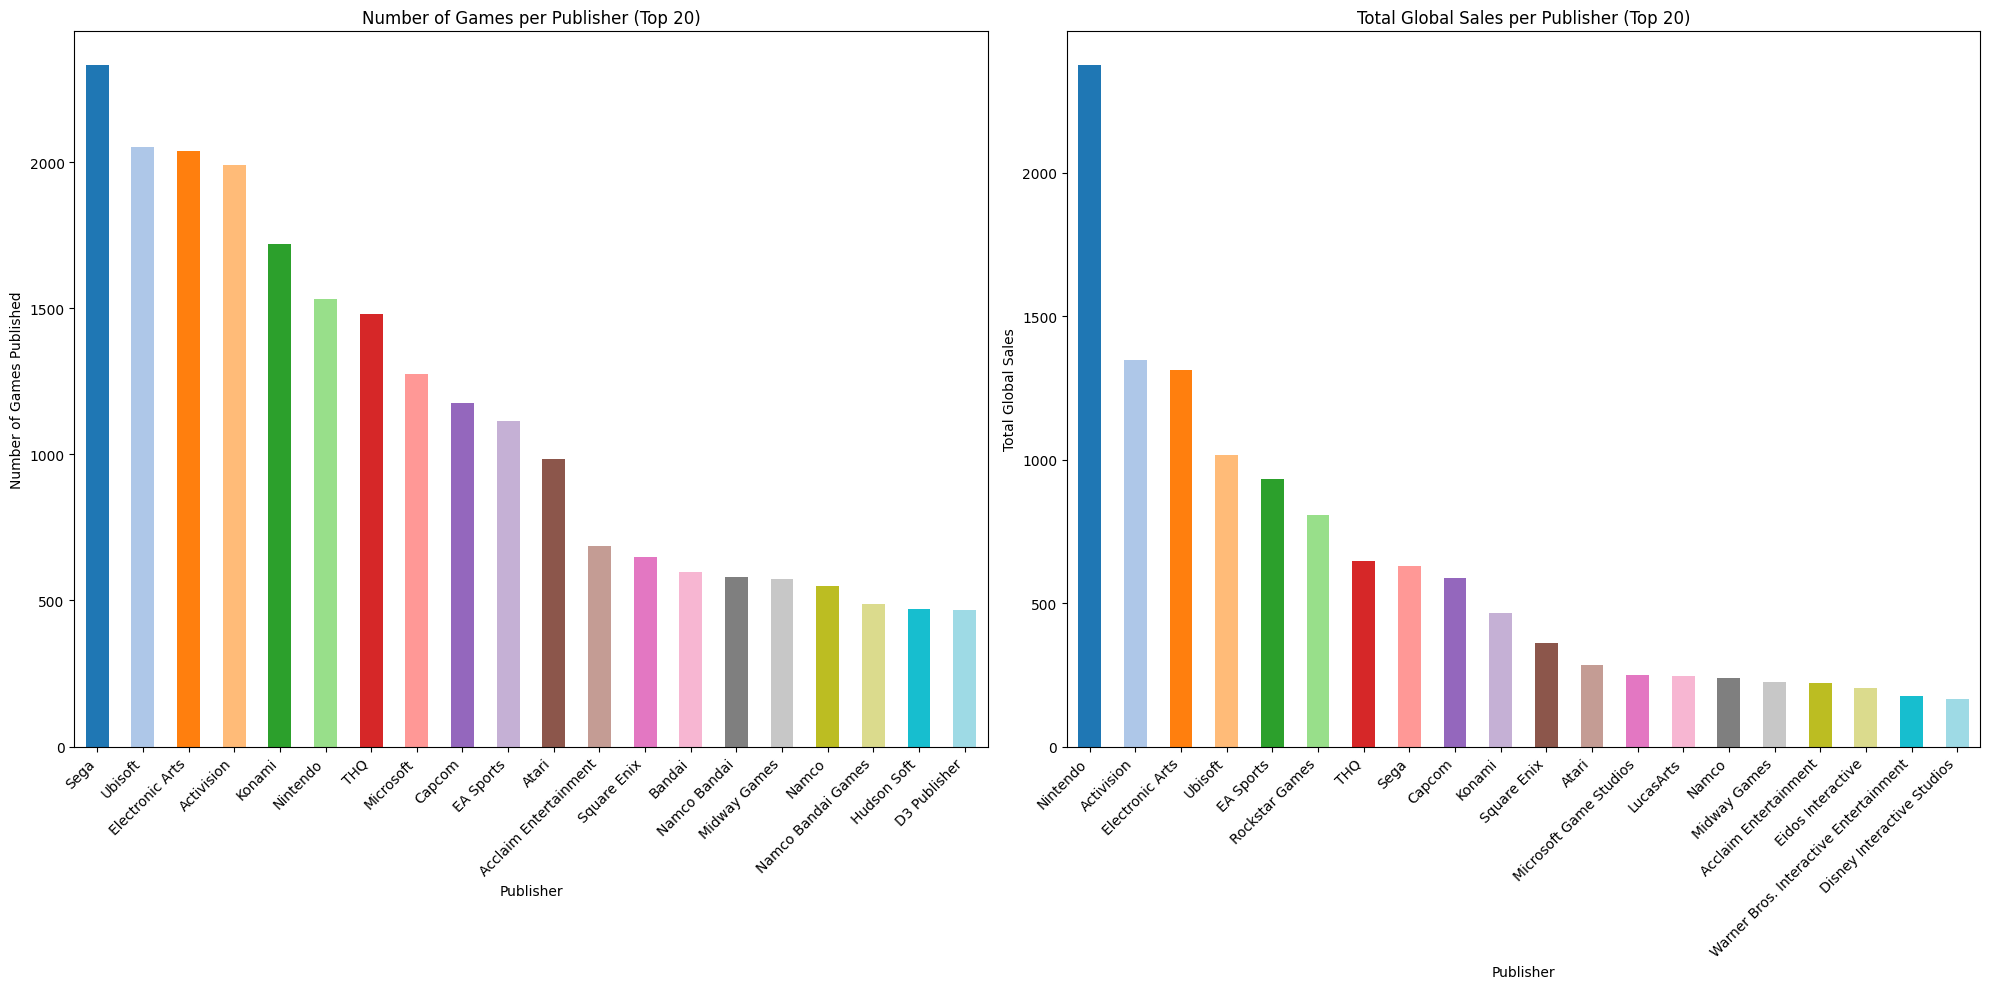

In [119]:
# @title
# Count the number of games for each publisher
test_d = game_stats.copy()
publisher_counts = game_stats['publisher'].value_counts().nlargest(20)

# Group by publisher and sum the global sales
publisher_sales = game_stats.groupby('publisher')['Global_Sales'].sum().nlargest(20)

# Create the bar chart
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

#Chart 1
publisher_counts.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(publisher_counts))))
plt.title('Number of Games per Publisher (Top 20)')
plt.xlabel('Publisher')
plt.ylabel('Number of Games Published')
plt.xticks(rotation=45, ha='right')

#Chart 2
plt.subplot(1, 2, 2)
publisher_sales.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(publisher_sales))))
plt.title('Total Global Sales per Publisher (Top 20)')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

Overall, Sega has been the dominant games publisher based on number of games the studio has put out. Sega's early focus was on arcade games and only began focusing on video games from the 1980's onwards which could be a reason for the high volume.

Ubisoft, EA and Activision are all well-known and were definitely no slouches either. They still continue to put out consistently high-quality releases to this day.
Konami and Nintendo are both Japanese publishers although while Konami makes games for multiple consoles, Nintendo focuses mainly on their own consoles (Wii, Switch etc).

Contrasting the sales graph to the number of games published sheds more light on the industry. Sega went from 1st position to 9th position when measured by sales and first place was taken by Nintendo. As we saw, they have been a dominant publisher and have become a household name with titles like the Mario Franchise, Legend of Zelda and Super Smash bros.

It goes to show that higher games published does not correlate to higher sales.

###Best selling game per publisher

<ipython-input-120-e7cb1e0dfa49>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='publisher', x='Global_Sales', data=best_selling_games, palette=colors, orient='h')
<ipython-input-120-e7cb1e0dfa49>:26: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y='publisher', x='Global_Sales', data=best_selling_games, palette=colors, orient='h')


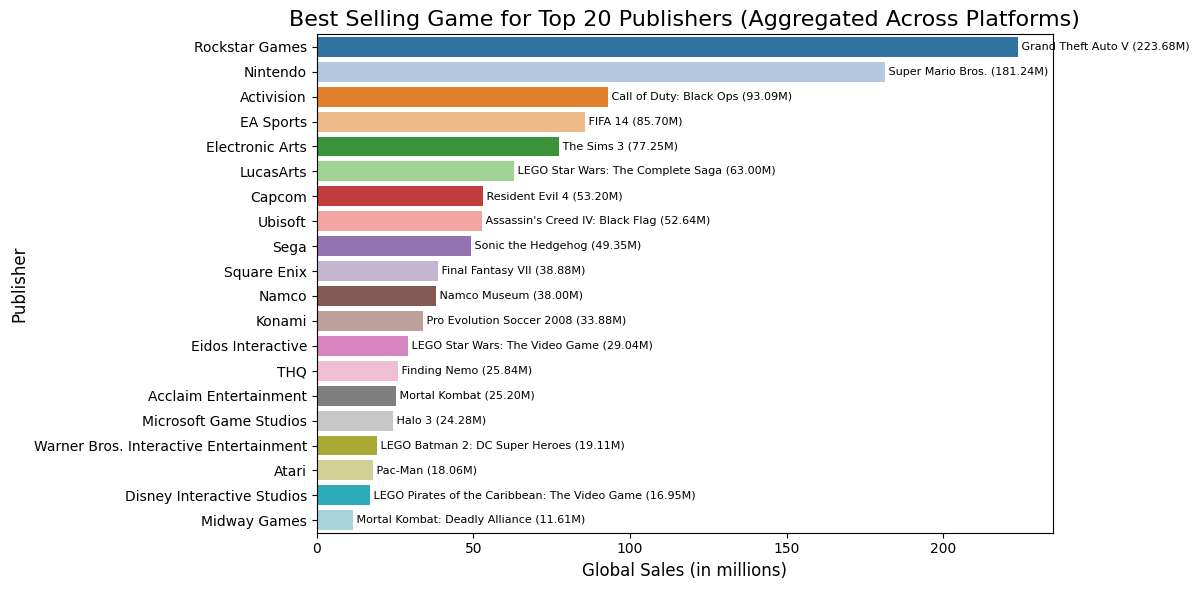

In [120]:
# @title
# Ensure no games with 0 sales
game_stats_clean = game_stats[game_stats['Global_Sales'] > 0]

# Group by publisher and sum Global_Sales to find the top 20 publishers by total global sales
top_publishers = game_stats_clean.groupby('publisher')['Global_Sales'].sum().nlargest(20).index

# Filter the dataset to include only games from the top 20 publishers
game_stats_top_publishers = game_stats_clean[game_stats_clean['publisher'].isin(top_publishers)]

# Aggregate sales across all platforms for each game, ex find all sales for Wii Sports across all platforms
games_aggregated = game_stats_top_publishers.groupby(['publisher', 'title'])['Global_Sales'].sum().reset_index()

# Find the single best-selling game for each of the top 20 publishers
best_selling_games = games_aggregated.loc[games_aggregated.groupby('publisher')['Global_Sales'].idxmax()]

# Sort the best-selling games by Global_Sales for visualization
best_selling_games = best_selling_games.sort_values('Global_Sales', ascending=False)

# Create the bar chart for the best-selling game for the top 20 publishers
plt.figure(figsize=(12, 6))

# Assign a colormap and convert it to a list for Seaborn
colors = plt.cm.tab20(np.arange(20))

# Horizontal bar chart with the correct order of publishers
sns.barplot(y='publisher', x='Global_Sales', data=best_selling_games, palette=colors, orient='h')

# Add game titles next to the bars
for i, (publisher, global_sales, title) in enumerate(zip(best_selling_games['publisher'], best_selling_games['Global_Sales'], best_selling_games['title'])):
    plt.text(global_sales, i, f" {title} ({global_sales:.2f}M)", ha='left', va='center', fontsize=8)

# Add title and labels
plt.title('Best Selling Game for Top 20 Publishers (Aggregated Across Platforms)', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Now we see that even though Nintendo has been the best selling publisher overall, when looking at sales of individual games, Rockstar Games actually takes top place with Grand Theft Auto V. Not surprisingly, Nintendo comes in at second place with Super Mario Bros.

That was great to see and now we can move on to visuals on the consols.

###Games graphs

####Top 20 games by sales

<ipython-input-171-fcb865629eaa>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top_games.plot(kind='bar', ax=ax1, color=plt.cm.get_cmap('tab20')(np.arange(len(top_games))))


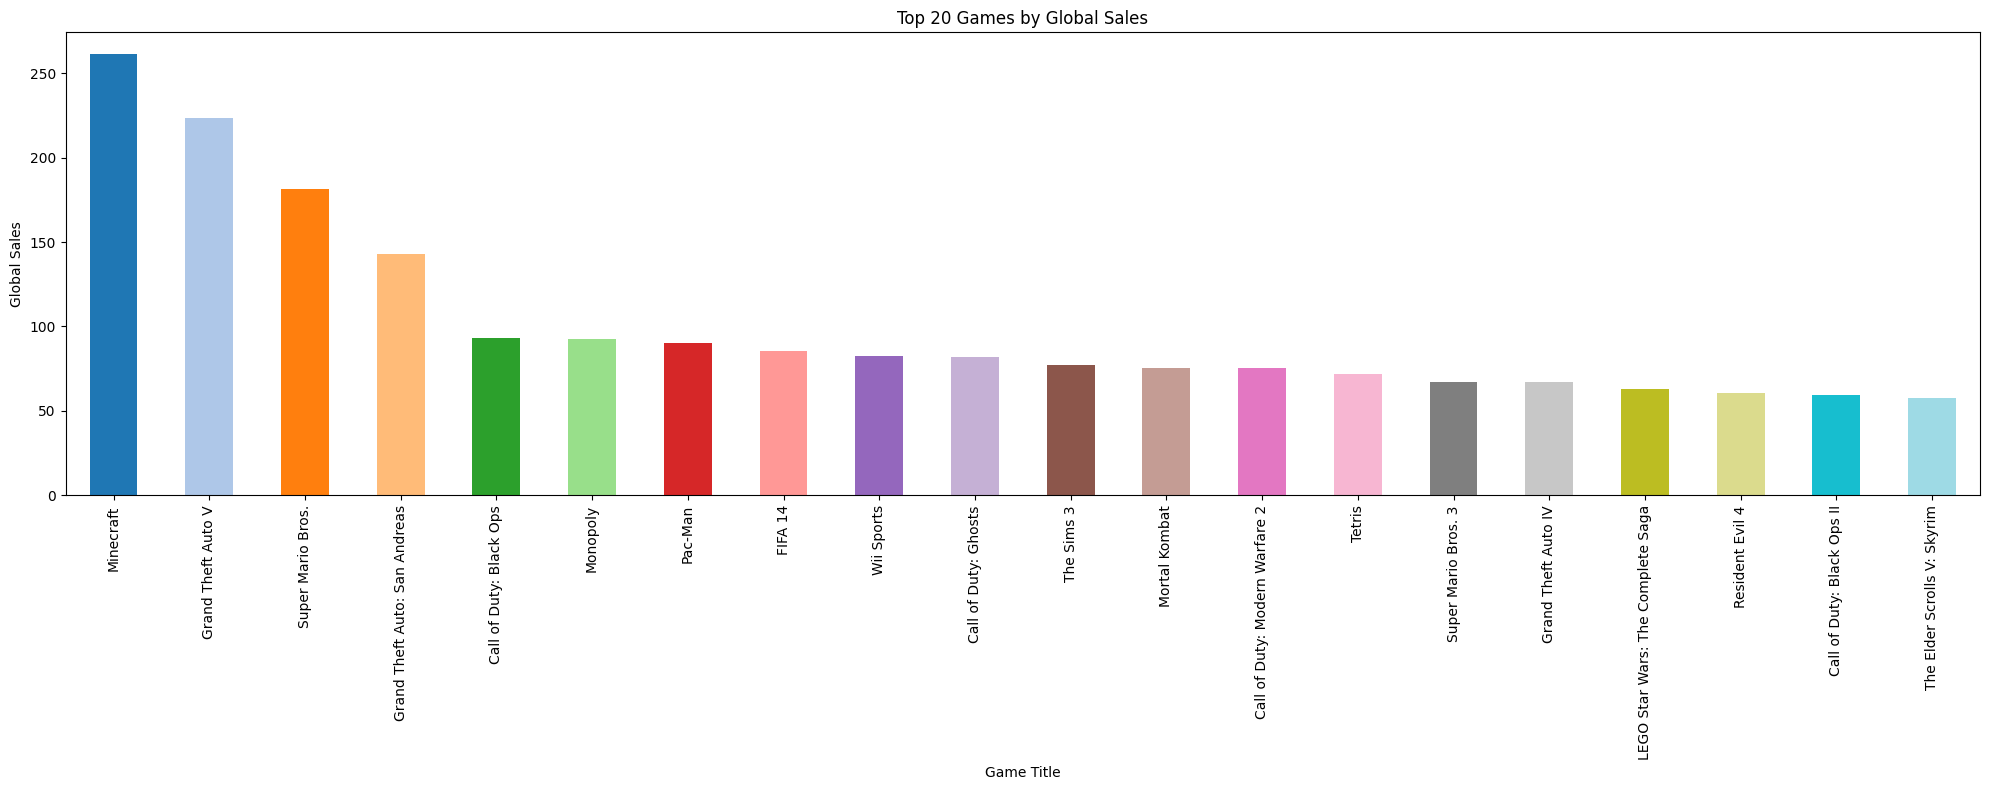

In [171]:
# Get sales for top 20 games overall
top_games = game_stats.groupby('title')['Global_Sales'].sum().nlargest(20)

#Calculate global sales in order to rank the top 20 games
top_20_games = game_stats.groupby('title').agg(
    NA_Sales=('NA_Sales', 'sum'),
    EU_Sales=('EU_Sales', 'sum'),
    JP_Sales=('JP_Sales', 'sum'),
    Other_Sales=('Other_Sales', 'sum'),
    Total_Sales=('Global_Sales', 'sum'),
).nlargest(20, 'Total_Sales')

#Drop the 'Global Sales' because it's not needed anymore
top_20_games.drop(columns=['Total_Sales'], inplace=True)

# Create the figure and subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 8))

# Plot the first chart (Global Sales)
top_games.plot(kind='bar', ax=ax1, color=plt.cm.get_cmap('tab20')(np.arange(len(top_games))))
ax1.set_title('Top 20 Games by Global Sales')
ax1.set_xlabel('Game Title')
ax1.set_ylabel('Global Sales')
#ax1.tick_params(axis='x', rotation=45, ha='right')

# Plot the second chart (Stacked Sales by Region)
# top_20_games.plot(kind='bar', stacked=True, ax=ax2)
# ax2.set_title('Sales by Region for Top 20 Games')
# ax2.set_xlabel('Game Title')
# ax2.set_ylabel('Sales (Millions)')
# #ax2.tick_params(axis='x', rotation=45, ha='right')
# ax2.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

One thing to note is that this is the best selling games regardless of publisher. That's why we have Minecraft in 1st place whereas before Minecraft didn't feature on the list since Majong is not a top 20 publisher.

Minecraft has become one of the most famous games, and top-sellers, in the world and this is reflected in the graph.

After Minecraft, we see GTA v and Super Mario Bros appearing again but after that, the rankings begin to diverge from what we saw before.

####Number of games per genre

<ipython-input-124-cbaa81af57eb>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  games_per_genre_year.plot(kind='bar', stacked=True, figsize=(15, 8), color=plt.cm.get_cmap('tab20')(np.arange(len(games_per_genre_year.columns))))


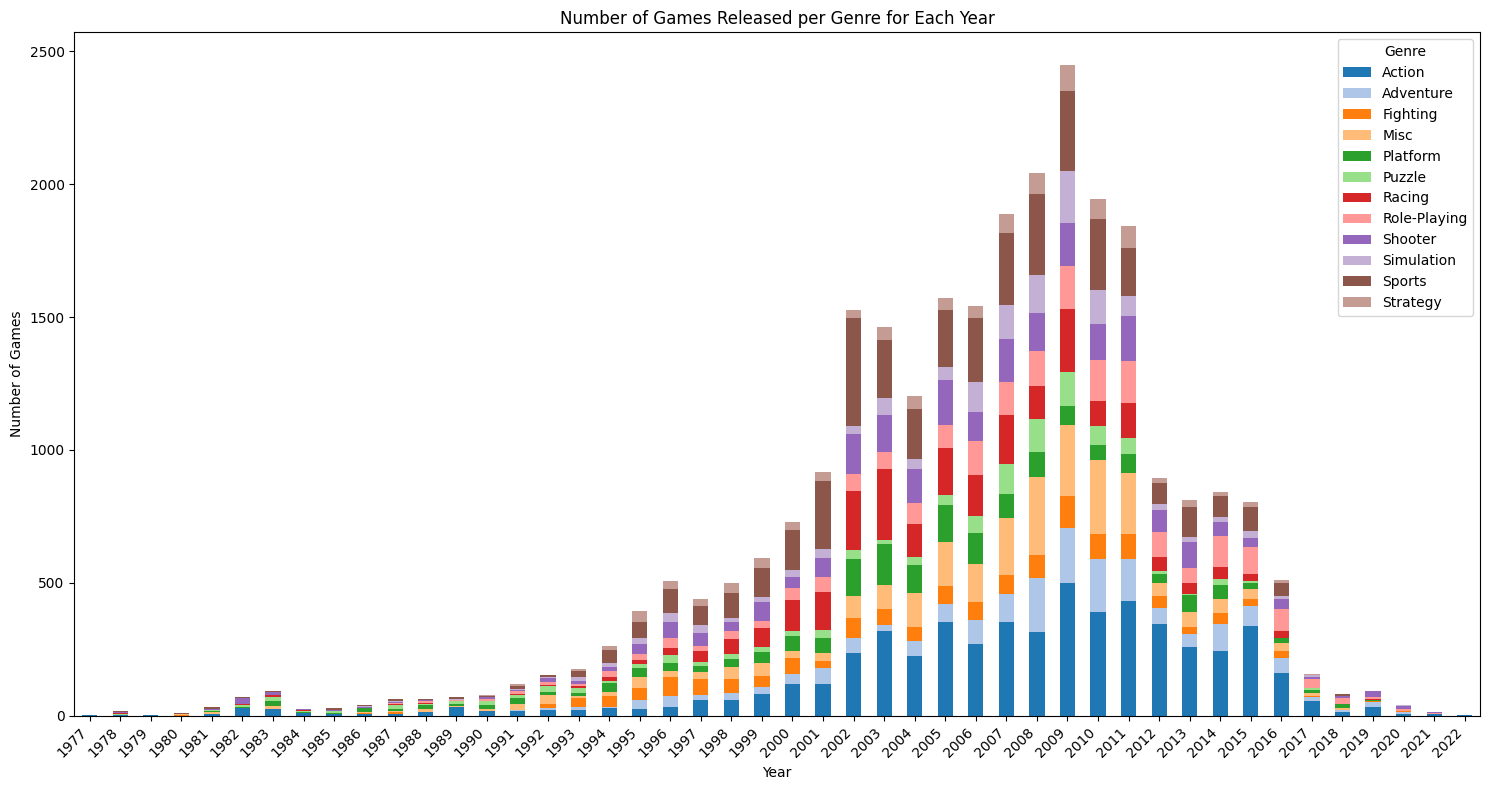

In [124]:
# Group by year and genre, then count the number of games
games_per_genre_year = game_stats.groupby([game_stats['release_date'].dt.year, 'Genre'])['title'].count().unstack()
#games_per_genre_year=games_per_genre_year.sort_values(ascending=False).unstack()
# Create the stacked bar chart
games_per_genre_year.plot(kind='bar', stacked=True, figsize=(15, 8), color=plt.cm.get_cmap('tab20')(np.arange(len(games_per_genre_year.columns))))
plt.title('Number of Games Released per Genre for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre')



plt.tight_layout()
plt.show()

Action and Sports are consistently high performers, even after the dip post 2010.

There is a noticeable increase in Adventure, Shooter snd RPG from the early 2000s, reflecting a shift in technological capabilities, like more responsive controllers, and player preferences.

The dip in production could be explained by many variables such as the rise of digital distribution platforms like steam, the surge in popularity of mobile gaming, or even the 2008 financial crisis.

####Number of games per genre with sales broken down by region


Index(['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing',
       'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure',
       'Strategy'],
      dtype='object', name='Genre')


<ipython-input-123-945c792fcc58>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax1.bar(genre_counts.index, genre_counts.values, color=plt.cm.get_cmap('tab20')(np.arange(len(genre_counts))))


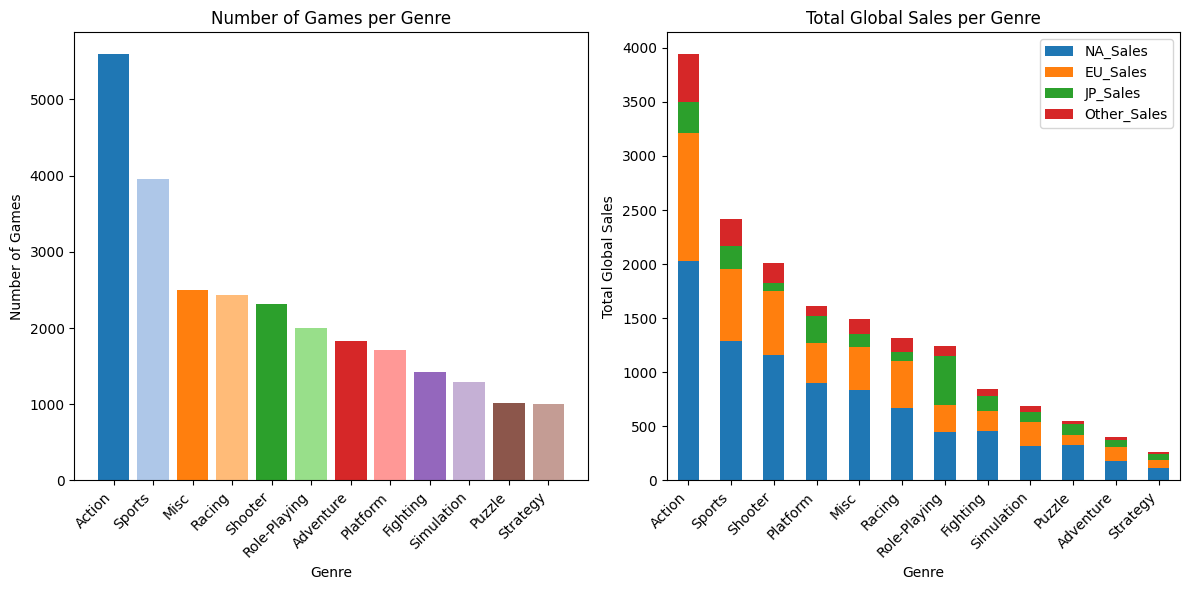

In [123]:
# @title
#Top 20 genres by game volume
genre_counts = game_stats['Genre'].value_counts()
#Genres by Global Sales
genre_sales = game_stats.groupby('Genre').agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum','Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False).drop(columns=['Global_Sales'])

print(genre_sales.index)
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the first bar chart on the first axis
ax1.bar(genre_counts.index, genre_counts.values, color=plt.cm.get_cmap('tab20')(np.arange(len(genre_counts))))
ax1.set_title('Number of Games per Genre')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of Games')
ax1.set_xticks(genre_counts.index)
ax1.set_xticklabels(genre_counts.index, rotation=45, ha='right')  # Ensure labels are rotated

# Create the second bar chart on the second axis
genre_sales.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Total Global Sales per Genre')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Total Global Sales')
ax2.set_xticklabels(genre_sales.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



Looking at Volume vs Sales again, and we can see that Action is the most popular genre by a wide margin. Sports follows in second but 3rd by volume is Misc while 3rd by sales is shooter. We don't know which kind of games make up Misc since there are over 2500.

In every genre the sales are predominantly in North America, followed by Europe and it seems like 'Other' is 3rd largest and Japan the smallest market. This is giving us some potential foresight into the overall sales trends that we'll look at later.

###Consol Graphs

####Number of games per platform and top publishers on PS2

<ipython-input-121-4527b8d31af2>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  platform_counts.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(platform_counts))))


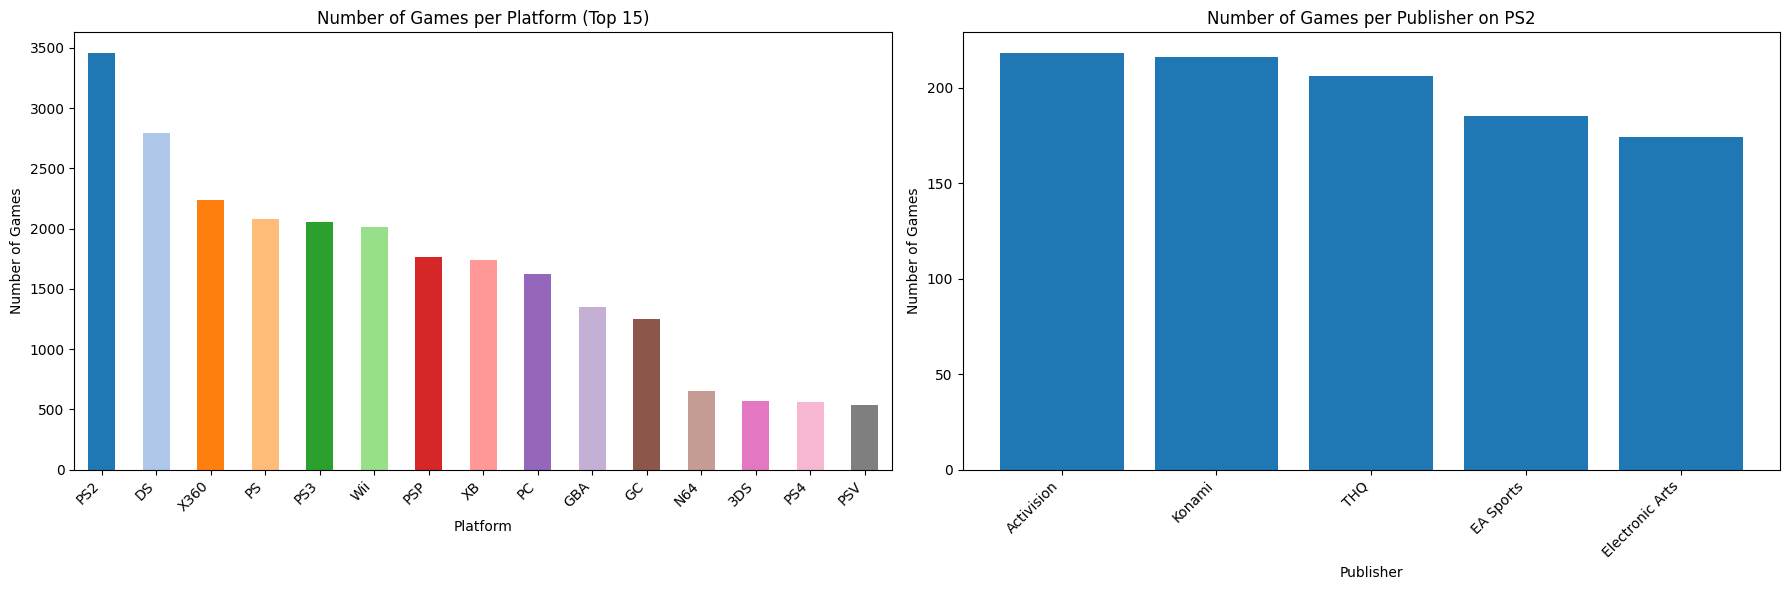

In [121]:
platform_counts = game_stats['Platform'].value_counts().nlargest(15)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
platform_counts.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(platform_counts))))
plt.title('Number of Games per Platform (Top 15)')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')


# Filter the DataFrame for PS2 games
ps2_games = game_stats[game_stats['Platform'] == 'PS2']
# Count the number of games for each publisher on PS2
publisher_counts_ps2 = ps2_games['publisher'].value_counts().nlargest(5)

plt.subplot(1, 2, 2)
plt.bar(publisher_counts_ps2.index, publisher_counts_ps2.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.title('Number of Games per Publisher on PS2')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

PS2 has the most games and it is the best selling consol ever - when it was released it was revolutionary and it's popularity continued until the PS3 was released.

Overall, Sony's consoles show strong performance, appearing 6 times. Second place seems belongs to Nintendo with 3 appearances.

Looking at the second chart, we can see Activision has been the dominant publisher on PS2. We can't say for sure that the volume of PS2 games caused their financial success but it likely contributed to it. This is something we can come back to later with a statistical test.

###Sales trends

####Best selling game per year

<ipython-input-125-983f843d9e4a>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_selling_games_per_year))


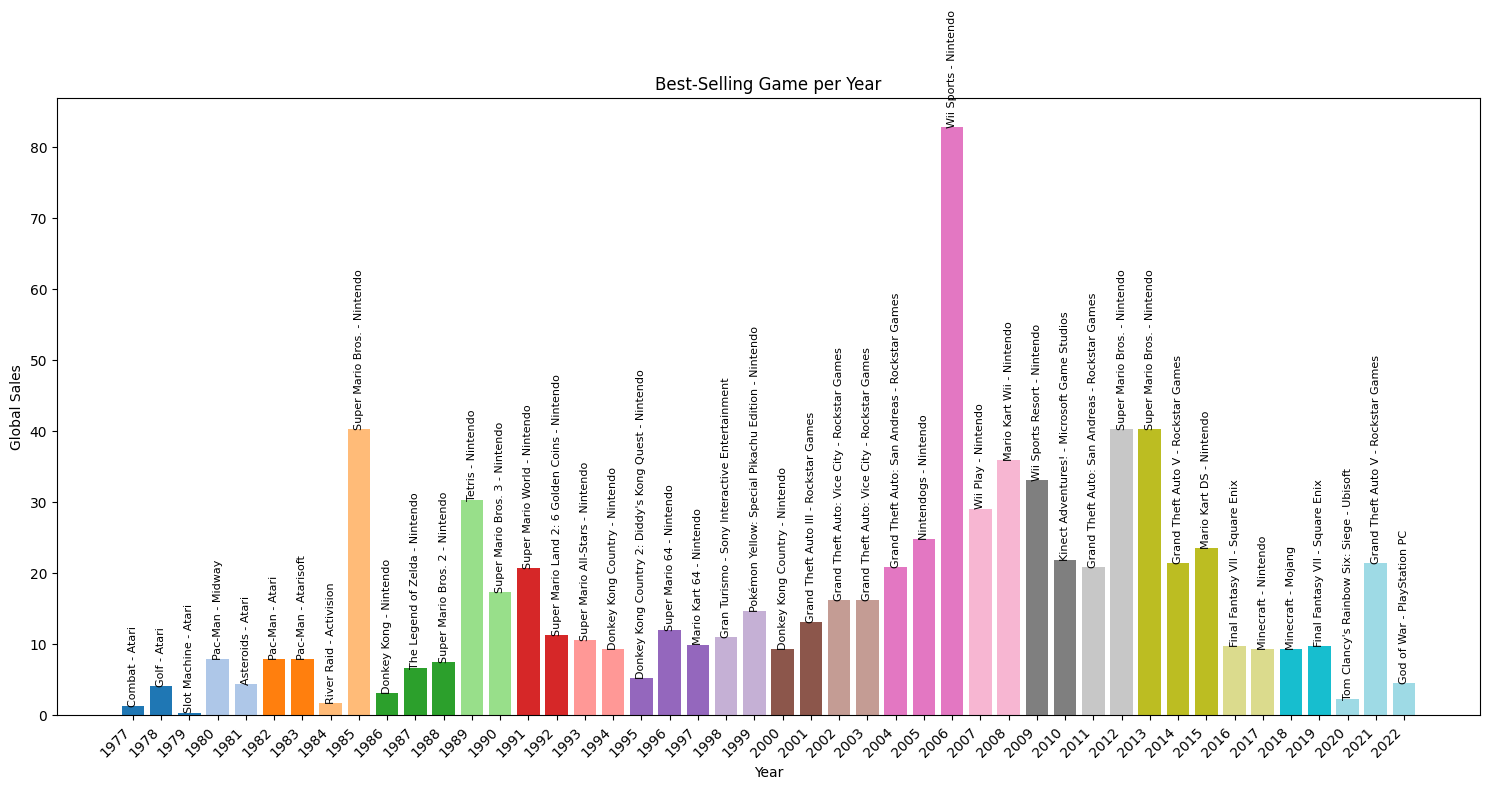

In [125]:
# Find the best-selling game for each year
best_selling_games_per_year = game_stats_clean.loc[game_stats_clean.groupby(game_stats_clean['release_date'].dt.year)['Global_Sales'].idxmax()]

# Create the bar chart
plt.figure(figsize=(15, 8))
colors = plt.cm.get_cmap('tab20', len(best_selling_games_per_year))
plt.bar(best_selling_games_per_year['release_date'].dt.year, best_selling_games_per_year['Global_Sales'], color=colors(np.arange(len(best_selling_games_per_year))))
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Best-Selling Game per Year')

# Add game titles above the bars
for i, row in best_selling_games_per_year.iterrows():
  plt.text(row['release_date'].year, row['Global_Sales'] + 0.3, row['title']+' - '+row['publisher'], rotation=90,ha='center', fontsize=8)

#Show every year
plt.xticks(np.arange(best_selling_games_per_year['release_date'].dt.year.min(), best_selling_games_per_year['release_date'].dt.year.max() + 1, 1), rotation=45, ha='right')
plt.tight_layout()
plt.show()






Looking at a breakdown of sales per year, no game has come close to the sales of Wii Sports in 2006. In fact, no other publisher has come close to Nintendo as they appear more than any other publisher.

####General sales trend over time

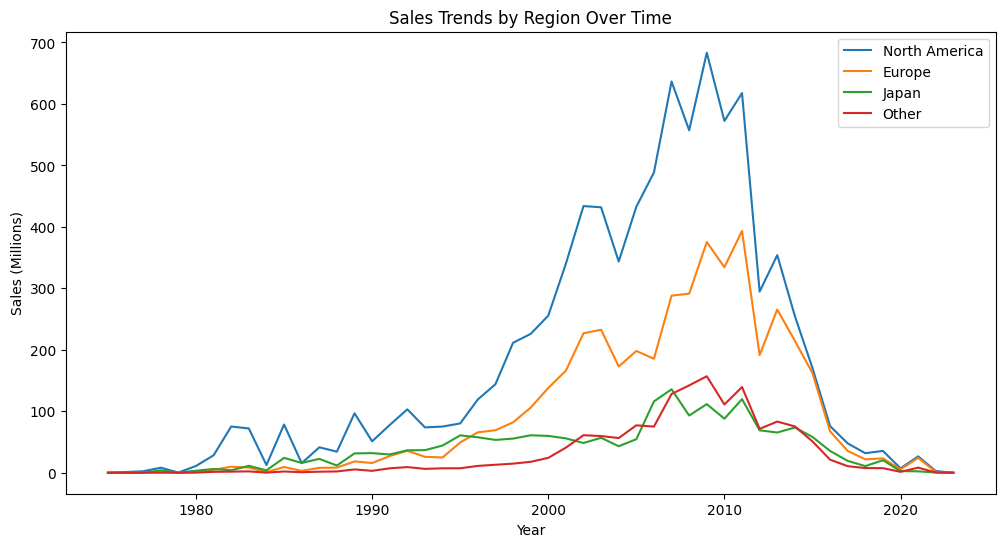

In [126]:
# @title
# Group the data by year and sum the sales for each region
sales_by_year = game_stats.groupby(game_stats['release_date'].dt.year)[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum().reset_index()

# Create a line plot to visualize the sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='NA_Sales', data=sales_by_year, label='North America')
sns.lineplot(x='release_date', y='EU_Sales', data=sales_by_year, label='Europe')
sns.lineplot(x='release_date', y='JP_Sales', data=sales_by_year, label='Japan')
sns.lineplot(x='release_date',y='Other_Sales',data=sales_by_year,label='Other')
plt.title('Sales Trends by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.show()


Onto Sales and we can see that sales follows the same pattern of game-releases in the chart above. This makes sense as sales follows the pattern of releases but it is still surprising that they seem so closely correlated since people could be buying older games still.

US sales dominates, followed by EU but Japan and Other are very closely aligned. I would have expected Japan sales to be higher since Japanese companies like Sega, Nintendo and Konami are all top publishers.

Let's break it down by publisher to see what their pattern looks like.

####Sales trends by publisher

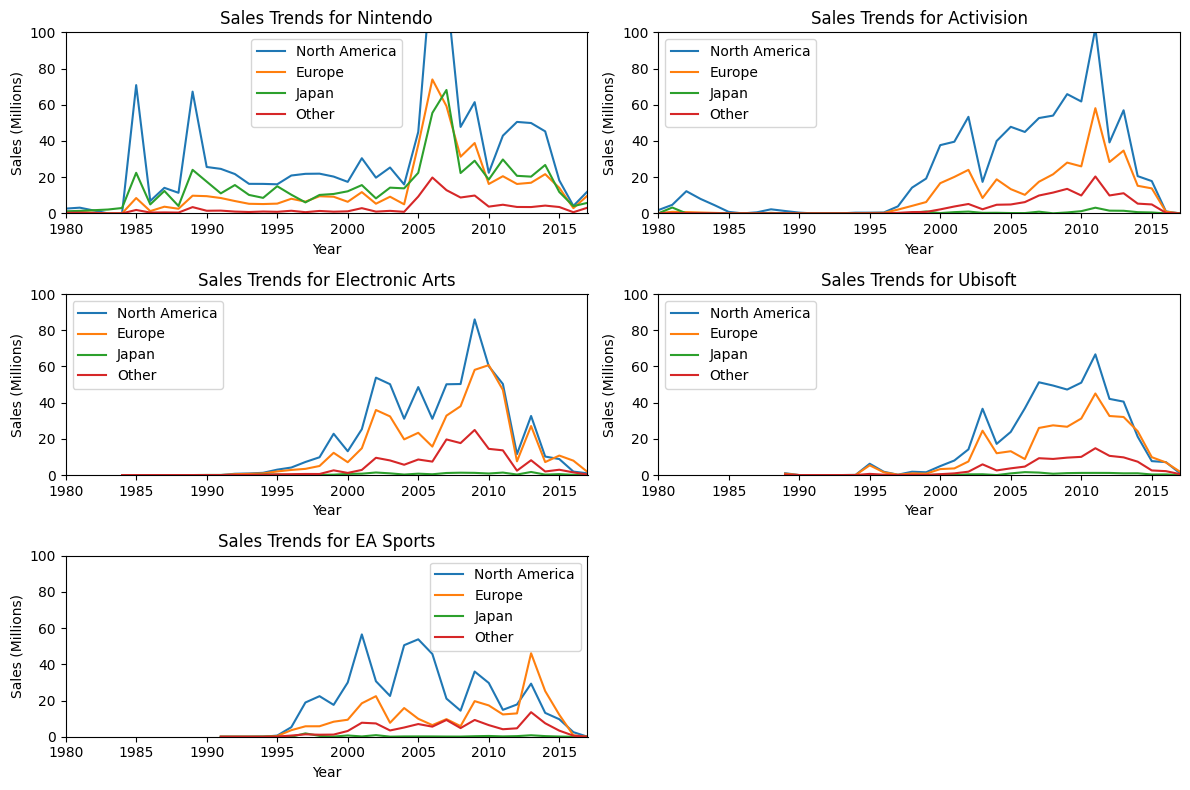

In [127]:

# Group the data by year and genre, then sum the sales for each region
sales_by_year_publisher = game_stats.groupby([game_stats['release_date'].dt.year, 'publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum().reset_index()

# # Get the top 10 platforms by total sales
top_5_publishers = game_stats.groupby('publisher')['Global_Sales'].sum().nlargest(5).index

# # Filter the data to include only the top 10 platforms
sales_by_year_platform_top10 = sales_by_year_publisher[sales_by_year_publisher['publisher'].isin(top_5_publishers)]

# # Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes=axes.flatten()

# # Plot sales trends for each genre
for i, publisher in enumerate(top_5_publishers):
    genre_data = sales_by_year_publisher[sales_by_year_publisher['publisher'] == publisher]
    sns.lineplot(x='release_date', y='NA_Sales', data=genre_data, ax=axes[i], label='North America')
    sns.lineplot(x='release_date', y='EU_Sales', data=genre_data, ax=axes[i], label='Europe')
    sns.lineplot(x='release_date', y='JP_Sales', data=genre_data, ax=axes[i], label='Japan')
    sns.lineplot(x='release_date', y='Other_Sales', data=genre_data, ax=axes[i], label='Other')
    axes[i].set_title(f'Sales Trends for {publisher}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sales (Millions)')
    axes[i].legend()
    axes[i].set_ylim(0, 100)
    axes[i].set_xlim(1980, 2017)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


As we saw above, NA had the most sales overall so it is not surprising to see that NA is the top market for each publisher. What I expected to see with Nintendo above is now more apparent. We can see that Japan matches, and outperforms in parts, the EU and Other. Out of the top 5, Nintendo has definitely captured the biggest share of the Japanese market.

The only other variation in countries is the EU for EA sports which performs relatively badly when compared to NA. Around 2012, the EU rises dramatically,and overtakes NA, before beginning to decline around 2013.

When looking at actual Sales revenue, here we can that Nintendo has been making sales since the mid-80's, putting them in a league of their own. Activision has some sales for pre-1995 but it looks insignificant comparitively.

Ubisoft, EA and Activision follow a similar trend. Sales started to pick up around 2000 follwed by a small dip, then another large increase around 2010 before tapering off towards 2015.

Nintendo had a spike around 1985, again around 1990 and then a period of flat sales until a big spike in 2005. As we saw above, this was when Wii Sports was released. Nintendo did't see the same spike as the other publishers around 2010, perhaps a new consol was released that Nintendo did not cater for.


####Sales trend by genre

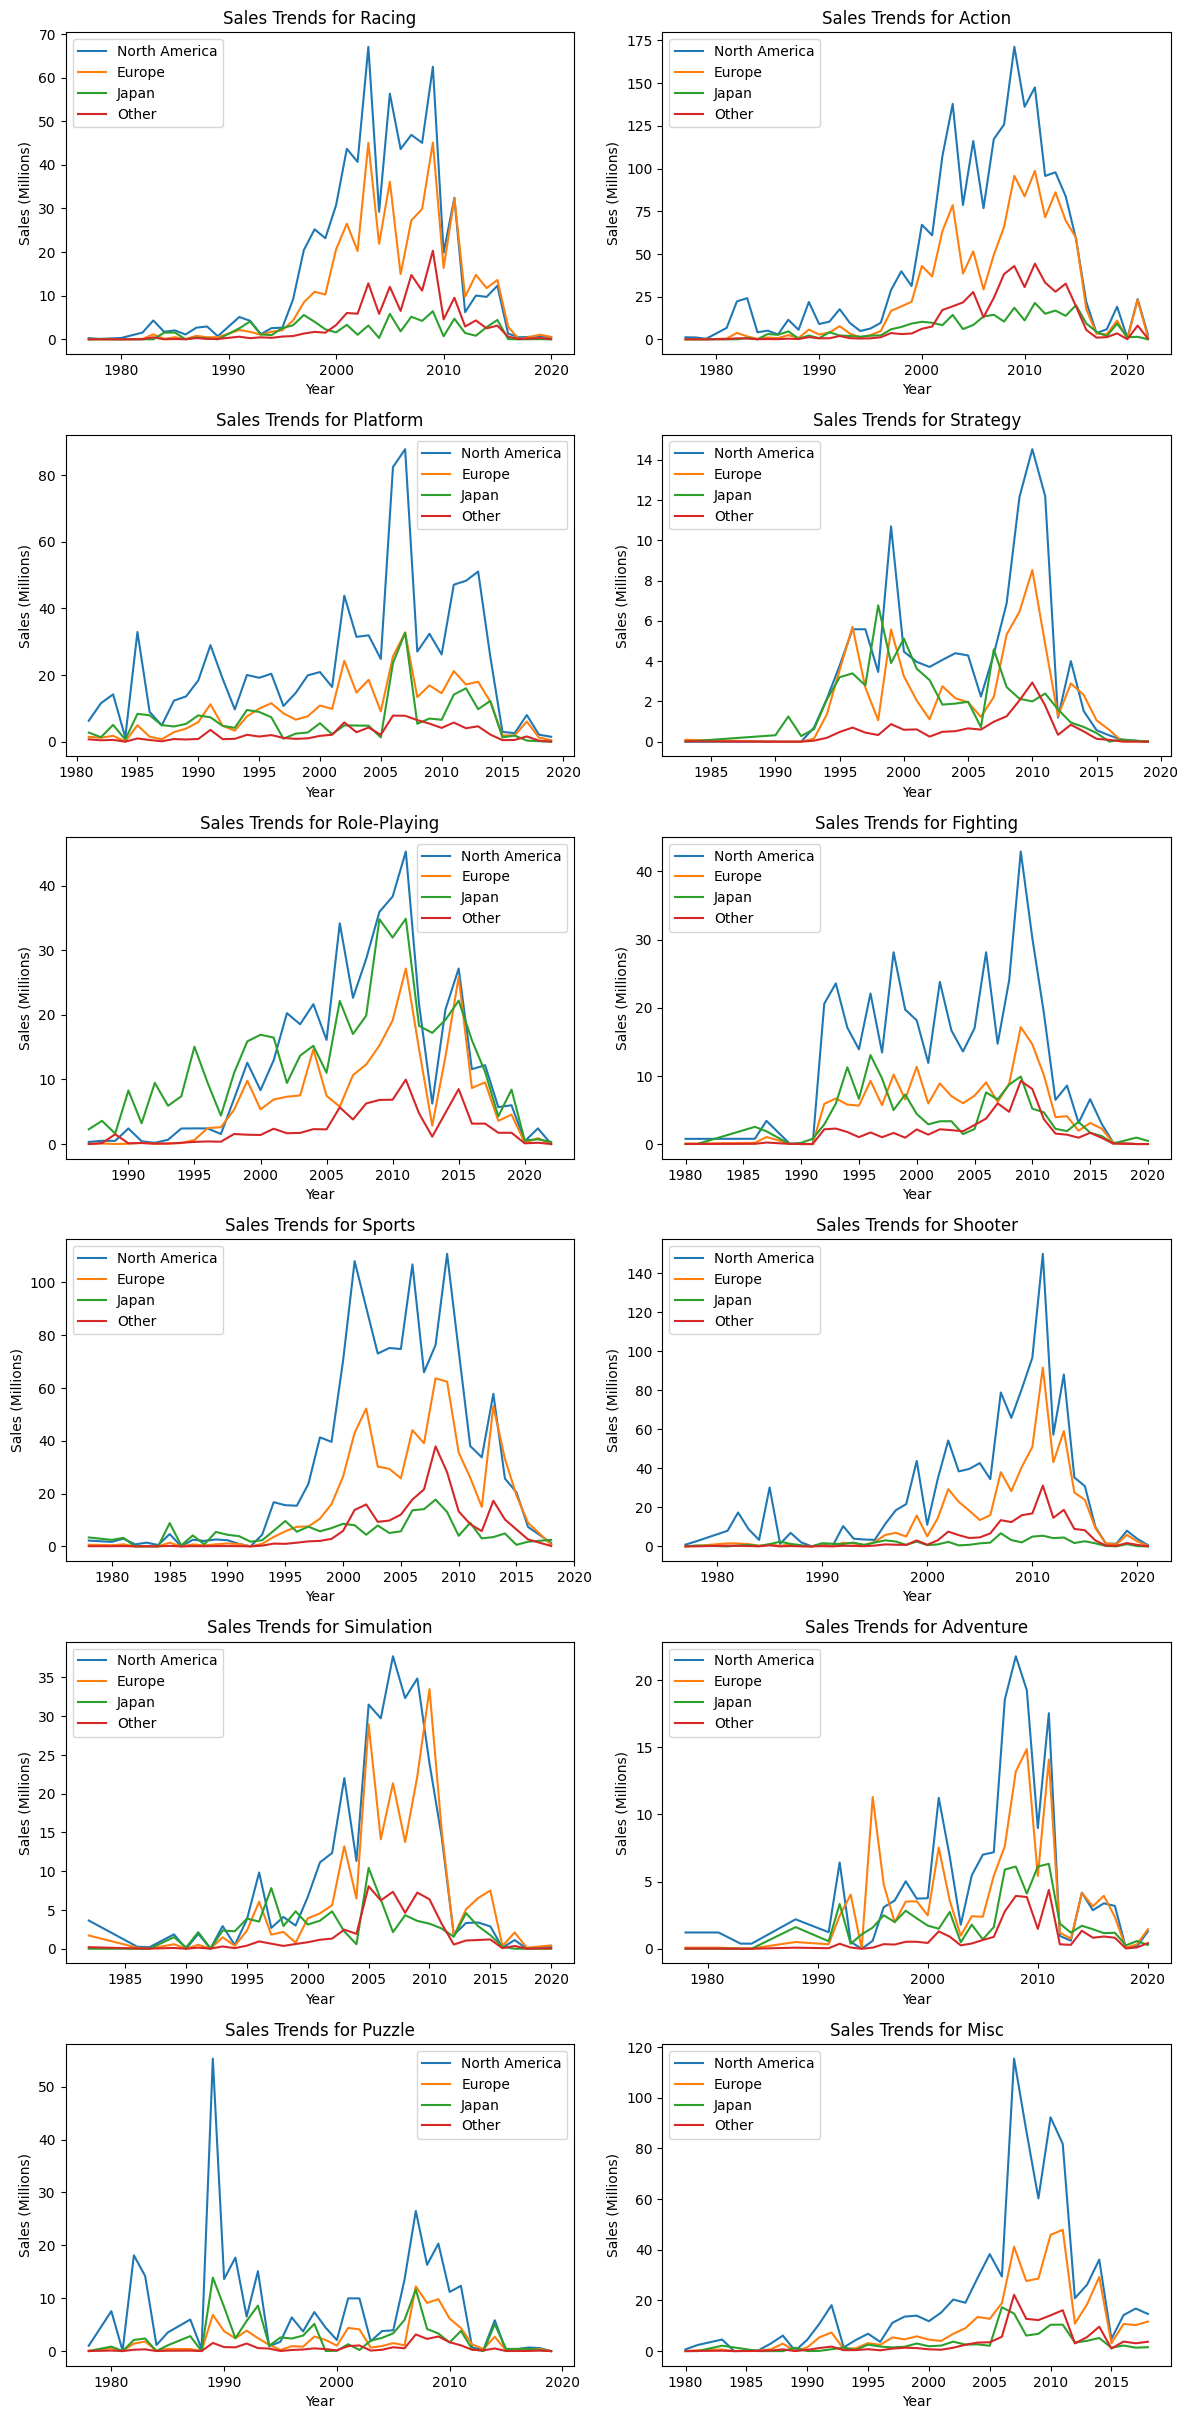

In [128]:
# @title
# Filter out 'nan' genre
game_stats = game_stats[game_stats['Genre'].notna()]

# Group the data by year and genre, then sum the sales for each region
sales_by_year_genre = game_stats.groupby([game_stats['release_date'].dt.year, 'Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum().reset_index()

# Get unique genres
genres = game_stats['Genre'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(genres), ncols=2, figsize=(12, 4 * len(genres)))


# Plot sales trends for each genre
axes=axes.flatten()
for i, genre in enumerate(genres):
    genre_data = sales_by_year_genre[sales_by_year_genre['Genre'] == genre]
    sns.lineplot(x='release_date', y='NA_Sales', data=genre_data, ax=axes[i], label='North America')
    sns.lineplot(x='release_date', y='EU_Sales', data=genre_data, ax=axes[i], label='Europe')
    sns.lineplot(x='release_date', y='JP_Sales', data=genre_data, ax=axes[i], label='Japan')
    sns.lineplot(x='release_date',y='Other_Sales', data=genre_data, ax=axes[i], label='Other')
    axes[i].set_title(f'Sales Trends for {genre}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sales (Millions)')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


North America and Europe are consistently the most dominant markets across all the genres while Japan shows strong sales only for specific genres like Fighting and Role-Playing.

Overall, most of the genres tend to peak in the early 2000s and begin to decline after the 2010s. Shooter and Action games see the biggest peaks. This could be due to shifts in gaming tech, new platforms being released or market saturation of a particular genre. We saw the increase in game production by genre above, most notably over the late 2000s, and the dominance of sports and shooter genre.

In [129]:
game_stats.to_csv('complete_game_stats.csv', index=False)

##Game rank

In [130]:
game_rank.head()

Name  User Rating  Num of Ratings  \
0       Outer Wilds: Archaeologist Edition          100               9   
1  Metal Gear Solid: The Legacy Collection          100              38   
2                      MLB Power Pros 2008          100              10   
3                      MLB Power Pros 2008          100              10   
4                      MLB Power Pros 2008          100              10   

   Critic Rating  Num of Critic Ratings release_date  \
0             85                      2          NaT   
1             87                      3   2013-07-09   
2             71                      4   2008-07-29   
3             71                      4   2008-08-25   
4             71                      4   2008-07-29   

                                             summary  metascore  userscore  
0                                                NaN         73         69  
1  Celebrating the 25th anniversary of the METAL ...         93         90  
2  With over ten different exciting game modes in...         67         85  
3  With over ten different exciting game modes in...         70         69  
4  With over ten different exciting game modes in...         79         89

In [131]:
game_rank.describe()

User Rating  Num of Ratings  Critic Rating  Num of Critic Ratings  \
count        22627           22627          22627                  22627   
mean            72              80             72                      5   
min             40               0              0                      1   
25%             66               5             65                      2   
50%             72              16             75                      4   
75%             80              53             81                      7   
max            100            4573            100                     60   
std             10             238             14                      5   

                        release_date  metascore  userscore  
count                          20840      22627      22627  
mean   2014-10-04 01:05:30.287908096         73         69  
min              1992-05-05 00:00:00         16          0  
25%              2010-09-28 00:00:00         71         67  
50%              2016-03-01 00:00:00         73         69  
75%              2019-04-24 06:00:00         77         77  
max              2023-03-09 00:00:00         98        100  
std                              NaN          9         12

The average ratings don't differ too much between user rating, critic rating and metascore and userscore which is unexpected since there are not a lot of reviews, especially in critic rating.

I want to look at a visualisation of the review scores and number of reviews(where relevant) since it's interesting to me to see the distribution from the two separate sources.

####Distribution of ratings

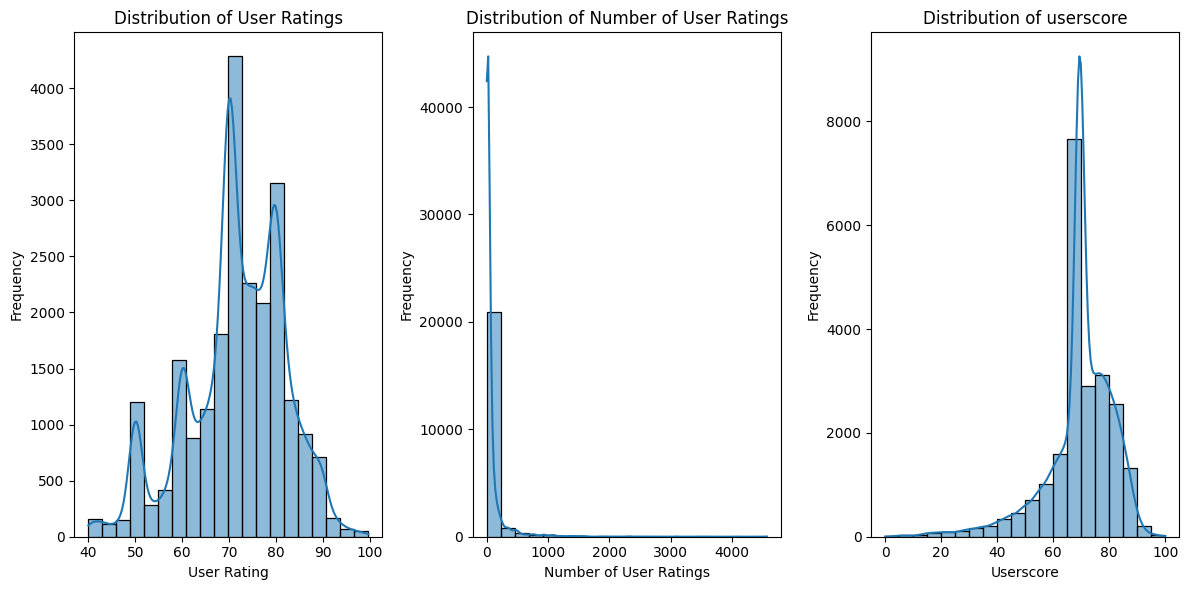

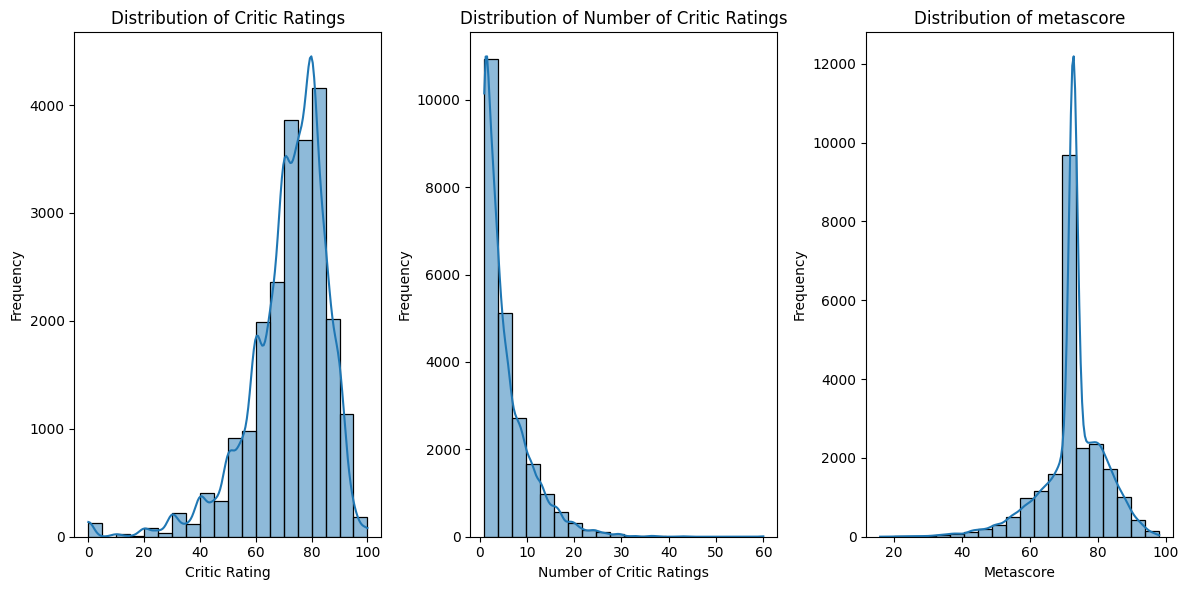

In [132]:
# User Rating and Number of User Ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(game_rank['User Rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(game_rank['Num of Ratings'], bins=20, kde=True)
plt.title('Distribution of Number of User Ratings')
plt.xlabel('Number of User Ratings')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.histplot(game_rank['userscore'],bins=20, kde=True)
plt.title('Distribution of userscore')
plt.xlabel('Userscore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Critic Rating and Number of Critic Ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(game_rank['Critic Rating'], bins=20, kde=True)
plt.title('Distribution of Critic Ratings')
plt.xlabel('Critic Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(game_rank['Num of Critic Ratings'], bins=20, kde=True)
plt.title('Distribution of Number of Critic Ratings')
plt.xlabel('Number of Critic Ratings')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.histplot(game_rank['metascore'],bins=20, kde=True)
plt.title('Distribution of metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The KDE on the distribution of user ratings indicates a bimodal distribution with a concentration of ratings between 60 and 80. There are also lower frequency of ratings at the peaks which suggests that most users perceive games as 'average to good' rather than 'poor' or 'excellent'.

The lower number of user ratings is evident in the heavily skewed distributin of the graph (top middle), indicating that majority of games receive less than 500 ratings.

The Userscore (top right) is more close to a normal distribution with the bulk of ratings around 60-80. Similarly, there is a focus of ratings around the middle region and a lack of games that receive very high or very low scores.

Generally, the critic scores are less like

---
---



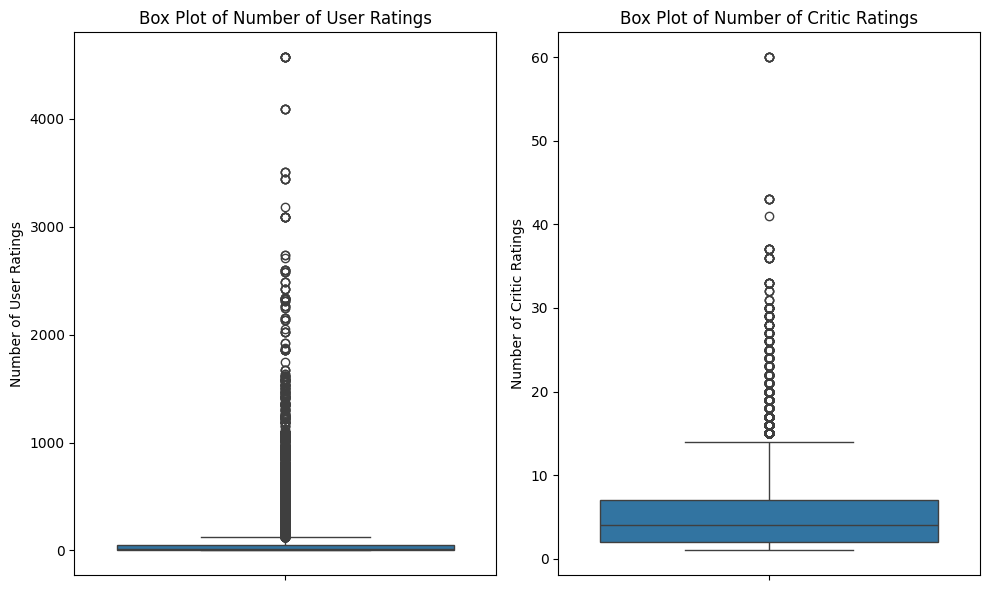

In [133]:
# prompt: make a box plot for num of user ratings and num of critic ratings in vertical orientation

import matplotlib.pyplot as plt
# Box plots for Num of User Ratings and Num of Critic Ratings
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=game_rank['Num of Ratings'])
plt.title('Box Plot of Number of User Ratings')
plt.ylabel('Number of User Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y=game_rank['Num of Critic Ratings'])
plt.title('Box Plot of Number of Critic Ratings')
plt.ylabel('Number of Critic Ratings')

plt.tight_layout()
plt.show()


####Metascore vs userscore

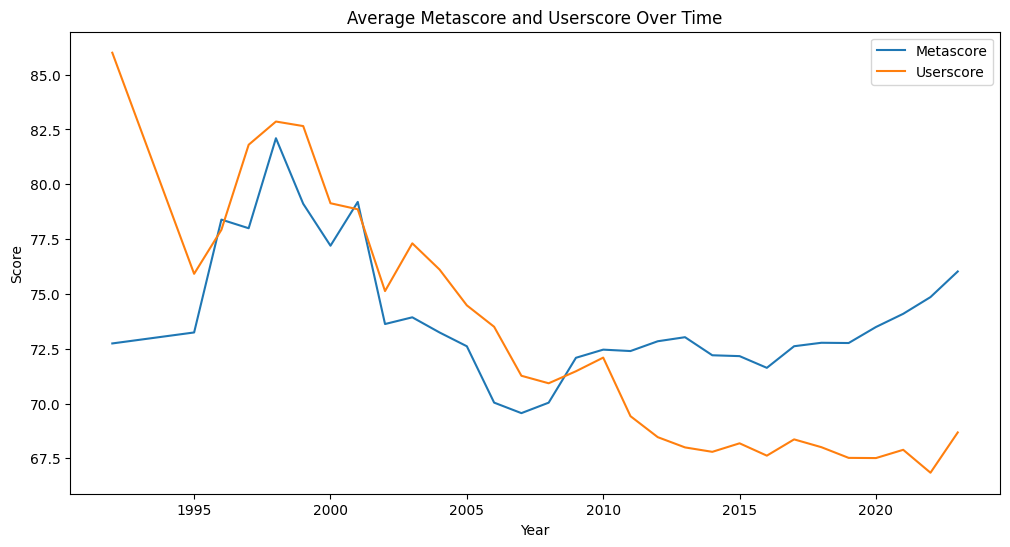

In [134]:
# Convert 'release_date' to year for grouping
game_rank['year'] = game_rank['release_date'].dt.year

# Group by year and calculate the average metascore and userscore
avg_scores_by_year = game_rank.groupby('year')[['metascore', 'userscore']].mean().reset_index()

# Create the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='metascore', data=avg_scores_by_year, label='Metascore')
sns.lineplot(x='year', y='userscore', data=avg_scores_by_year, label='Userscore')
plt.title('Average Metascore and Userscore Over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.show()


Interesting trend. My theory is initialy, video games were new and novel and almost any new game was impressive. As video game prevelance rose, players became more critical and developers started pushing out more and more games of varying quality.

The divergance between user scores and metascore can be due to many reasons but some potentials include:
- A Difference in priority between critics and users. Critics cmay have began appreciating advancements in technology or novel features added to gameplay while users prioritized multiplayer experience and bug fixes. Certain new features also alienate old players and can lead to negative reviews.
- Franchise fatigue.
As certain genres and franchises became oversaturated, users became dissatisfied by new releases while critics still appreciated franchise releases for being a well-made game, albeit in a crowded space.
- Review bombing. Around 2010 rit became popular to downvote a franchise due to unrelated aspects, like a companies dealing with sexual harrasment.
- Change in calculation. It seems like that there could have been a change to how the metascore was calculated vs user score.


##Game Streams


In [135]:
stream_data.head()

Game  Watch time (hrs)  Stream time (hrs)  Peak viewers  \
1  Grand Theft Auto V        1334643691           24501434        528554   
2   League of Legends        1322721813           25621285       2597522   
3            VALORANT         988201714           39976969       1196352   
4      Counter-Strike         686253955           11619337       1117445   
5            Fortnite         617312328           59282240       3291525   

   Peak channels  Streamers  Average viewers  Average channels  \
1           5377    1480243           152373              2797   
2           6356     938141           151012              2925   
3           9350    1587006           112821              4564   
4           4016     864073            78348              1326   
5          85481    4945424            70477              6768   

   Average viewer ratio       Year  
1                    54 2023-01-01  
2                    52 2023-01-01  
3                    25 2023-01-01  
4                    59 2023-01-01  
5                    10 2023-01-01

In [136]:
pd.options.display.float_format = '{:.0f}'.format
stream_data.describe()

Watch time (hrs)  Stream time (hrs)  Peak viewers  Peak channels  \
count               394                394           394            394   
mean          197436783            6507972        408830           4897   
min            11349022              16245         17516             21   
25%            45165720            1062157         88778            546   
50%            81379330            2337820        199671           1543   
75%           202177254            7260896        446234           4947   
max          1874989023           82752857       3462517         129860   
std           290715430           11193302        567576          11204   

       Streamers  Average viewers  Average channels  Average viewer ratio  \
count        394              394               394                   394   
mean      358799            22527               742                    55   
min          252             1292                 1                     2   
25%        54174             5153               120                    20   
50%       155153             9290               266                    33   
75%       384061            23082               827                    65   
max      4945424           214064              9421                   836   
std       584405            33173              1277                    69   

                                Year  
count                            394  
mean   2019-06-27 04:30:27.411167488  
min              2016-01-01 00:00:00  
25%              2017-01-01 00:00:00  
50%              2019-01-01 00:00:00  
75%              2021-01-01 00:00:00  
max              2023-01-01 00:00:00  
std                              NaN

####Games by watch time vs stream time

<ipython-input-137-6d741d765547>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top_20_watchtime.plot(kind='bar', x='Game', y='Watch time (hrs)', color=plt.cm.get_cmap('tab20')(np.arange(len(top_20_watchtime))))
<ipython-input-137-6d741d765547>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top_20_streamtime.plot(kind='bar', x='Game', y='Stream time (hrs)', color=plt.cm.get_cmap('tab20')(np.arange(len(top_20_streamtime))))


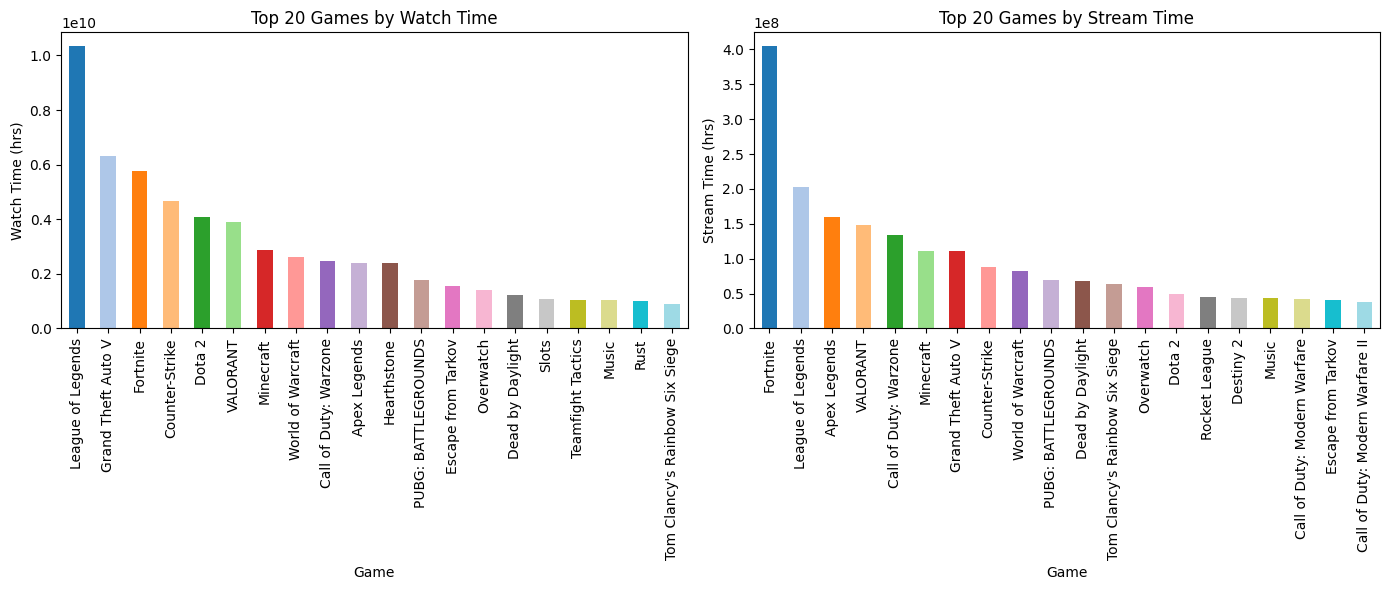

In [137]:


#Grouping data by game and summing total watch hours
top_20_watchtime = stream_data.groupby('Game')['Watch time (hrs)'].sum().nlargest(20)
#Grouping data by game and summing total stream hours
top_20_streamtime = stream_data.groupby('Game')['Stream time (hrs)'].sum().nlargest(20)

# Create the bar chart
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
top_20_watchtime.plot(kind='bar', x='Game', y='Watch time (hrs)', color=plt.cm.get_cmap('tab20')(np.arange(len(top_20_watchtime))))
plt.title('Top 20 Games by Watch Time')
plt.xlabel('Game')
plt.ylabel('Watch Time (hrs)')



# Create the bar chart
plt.subplot(1, 2, 2)
top_20_streamtime.plot(kind='bar', x='Game', y='Stream time (hrs)', color=plt.cm.get_cmap('tab20')(np.arange(len(top_20_streamtime))))
plt.title('Top 20 Games by Stream Time')
plt.xlabel('Game')
plt.ylabel('Stream Time (hrs)')

plt.tight_layout()
plt.show()

Comparing watch time vs stream time and you can see the difference in preferences between streamers and viewers. The top games are almost completely different, except for League of Legends which moves from 1st place by watch time to 2nd place by stream time. The reason for the difference in rankings is not clear but it could be due to a number of factors like social media interest in the game, game genre, recency of game release etc.

####Most watched game per year

<ipython-input-138-4d138219fbf1>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bars = plt.bar(top_game_per_year['Year'], top_game_per_year['Watch time (hrs)'], color=plt.cm.get_cmap('tab20')(np.arange(len(top_game_per_year))))


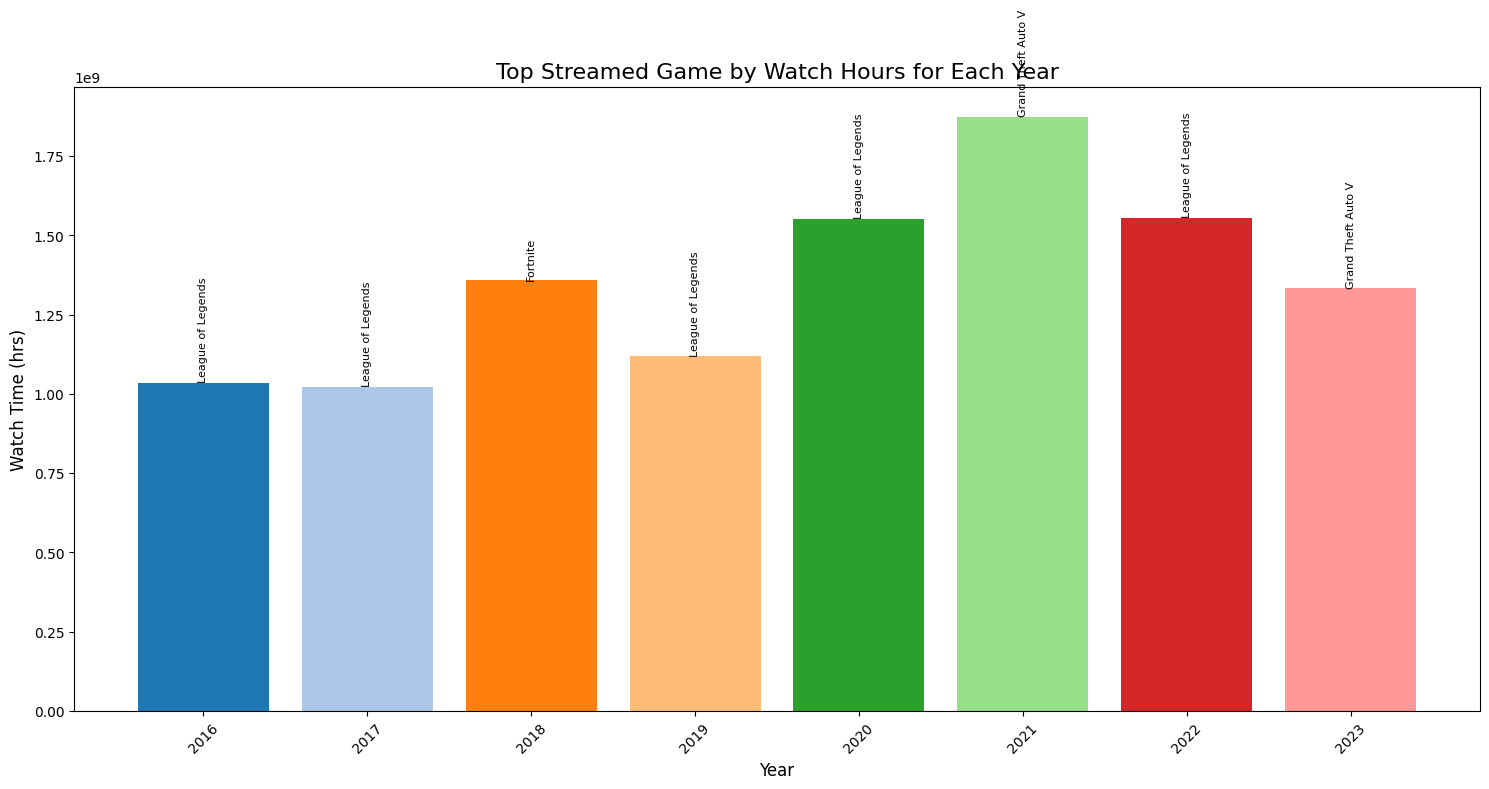

In [138]:
# Extract the year
stream_data['Year'] = pd.to_datetime(stream_data['Year']).dt.year

# Group by year and find the game with the maximum watch time for each year
top_game_per_year = stream_data.sort_values(by=['Year', 'Watch time (hrs)', 'Peak viewers'], ascending=[True, False, False])
top_game_per_year = top_game_per_year.drop_duplicates('Year', keep='first')

# Create the bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(top_game_per_year['Year'], top_game_per_year['Watch time (hrs)'], color=plt.cm.get_cmap('tab20')(np.arange(len(top_game_per_year))))

# Customize the chart
plt.title('Top Streamed Game by Watch Hours for Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Watch Time (hrs)', fontsize=12)
plt.xticks(rotation=45)

for bar, game in zip(bars, top_game_per_year['Game']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+0.5,
             game,
             ha='center', va='bottom',
             rotation=90, fontsize=8)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


Interesting! Our graph shows that very few of the top selling games we saw previously have a relation to streaming. In fact, League of Legends was released in 2009 and still takes the top streaming spot over and over again.

This is something else we can test with a stats model.

###Watch time vs Stream time

In [140]:
# Select the columns to standardize
columns_to_standardize = ['Watch time (hrs)', 'Stream time (hrs)']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
stream_data[['Watch time_standardized','Stream time_standardized']] = scaler.fit_transform(stream_data[columns_to_standardize])


Game  Watch time (hrs)  Stream time (hrs)  Peak viewers  \
1  Grand Theft Auto V        1334643691           24501434        528554   
2   League of Legends        1322721813           25621285       2597522   
3            VALORANT         988201714           39976969       1196352   
4      Counter-Strike         686253955           11619337       1117445   
5            Fortnite         617312328           59282240       3291525   

   Peak channels  Streamers  Average viewers  Average channels  \
1           5377    1480243           152373              2797   
2           6356     938141           151012              2925   
3           9350    1587006           112821              4564   
4           4016     864073            78348              1326   
5          85481    4945424            70477              6768   

   Average viewer ratio  Year  Watch time_standardized  \
1                    54  2023                        4   
2                    52  2023                        4   
3                    25  2023                        3   
4                    59  2023                        2   
5                    10  2023                        1   

   Stream time_standardized  
1                         2  
2                         2  
3                         3  
4                         0  
5                         5

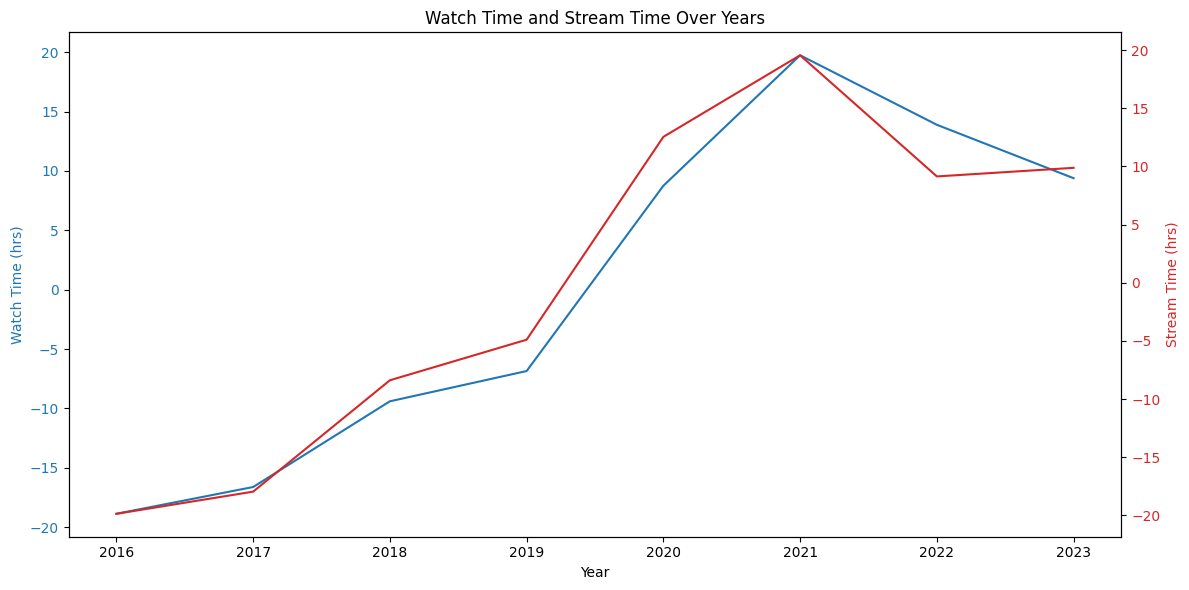

In [142]:
# Group by year and calculate total watch time and stream time
yearly_data = stream_data.groupby('Year').agg({'Watch time_standardized': 'sum', 'Stream time_standardized': 'sum'})

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot watch time on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Watch Time (hrs)', color=color)
ax1.plot(yearly_data.index, yearly_data['Watch time_standardized'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot stream time on the right y-axis
color = 'tab:red'
ax2.set_ylabel('Stream Time (hrs)', color=color)
ax2.plot(yearly_data.index, yearly_data['Stream time_standardized'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Watch Time and Stream Time Over Years')
fig.tight_layout()
plt.show()


After standardising the data, we can see that both watch time and stream time follow the same general upward trend iuntil 2021. Stream time is higher across all the years until around 2021 when watch time briefly overtakes before Stream time resumes its lead around 2023.

This means, firstly, that streaming has become an increasingly popular format over time. The rise of platforms like Twitch created a whole new industry where people could become full-time streamers. Secondly, it shows us that there have regularly been more people streaming than watching. The reason for this trend swtiching around in 2021 is unclear but may be due to streaming becoming more appealing to a wider audience.

#Correlations

Before we get started with any correlations, we need to encode the categorical data.

For simplicity sake,I'll filter game_stats to only shp

In [143]:
game_stats_encoded = game_stats_top_publishers.copy()
game_stats_encoded.drop(['title'],axis=1,inplace=True)
game_stats_encoded = pd.get_dummies(game_stats_encoded, columns=['Genre', 'Platform','publisher'])
pd.set_option('display.max_columns', 1000)
game_stats_encoded.head()

release_date  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
1   2005-11-15         2         2         0            0             4   
2   2005-11-15         1         2         0            1             3   
3   2005-11-15         1         1         0            0             2   
4   2005-11-15         1         0         0            0             1   
5   2005-11-15         0         1         0            0             1   

   Genre_Action  Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
1         False            False           False       False           False   
2         False            False           False       False           False   
3         False            False           False       False           False   
4         False            False           False       False           False   
5         False            False           False       False           False   

   Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
1         False          True               False          False   
2         False          True               False          False   
3         False          True               False          False   
4         False          True               False          False   
5         False          True               False          False   

   Genre_Simulation  Genre_Sports  Genre_Strategy  Platform_2600  \
1             False         False           False          False   
2             False         False           False          False   
3             False         False           False          False   
4             False         False           False          False   
5             False         False           False          False   

   Platform_3DO  Platform_3DS  Platform_DC  Platform_DS  Platform_GB  \
1         False         False        False        False        False   
2         False         False        False        False        False   
3         False         False        False        False        False   
4         False         False        False        False        False   
5         False         False        False        False        False   

   Platform_GBA  Platform_GC  Platform_GEN  Platform_N64  Platform_NES  \
1         False        False         False         False         False   
2         False        False         False         False         False   
3         False        False         False         False         False   
4         False        False         False         False         False   
5         False        False         False         False         False   

   Platform_NG  Platform_PC  Platform_PS  Platform_PS2  Platform_PS3  \
1        False        False        False          True         False   
2        False        False        False         False          True   
3        False        False        False         False         False   
4        False        False        False         False         False   
5        False        False        False         False         False   

   Platform_PS4  Platform_PSP  Platform_PSV  Platform_SAT  Platform_SCD  \
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   
5         False         False          True         False         False   

   Platform_SNES  Platform_WS  Platform_Wii  Platform_WiiU  Platform_X360  \
1          False        False         False          False          False   
2          False        False         False          False          False   
3          False        False         False          False           True   
4          False        False         False          False           True   
5          False        False         False          False          False   

   Platform_XB  Platform_XO

###Publisher and Sales

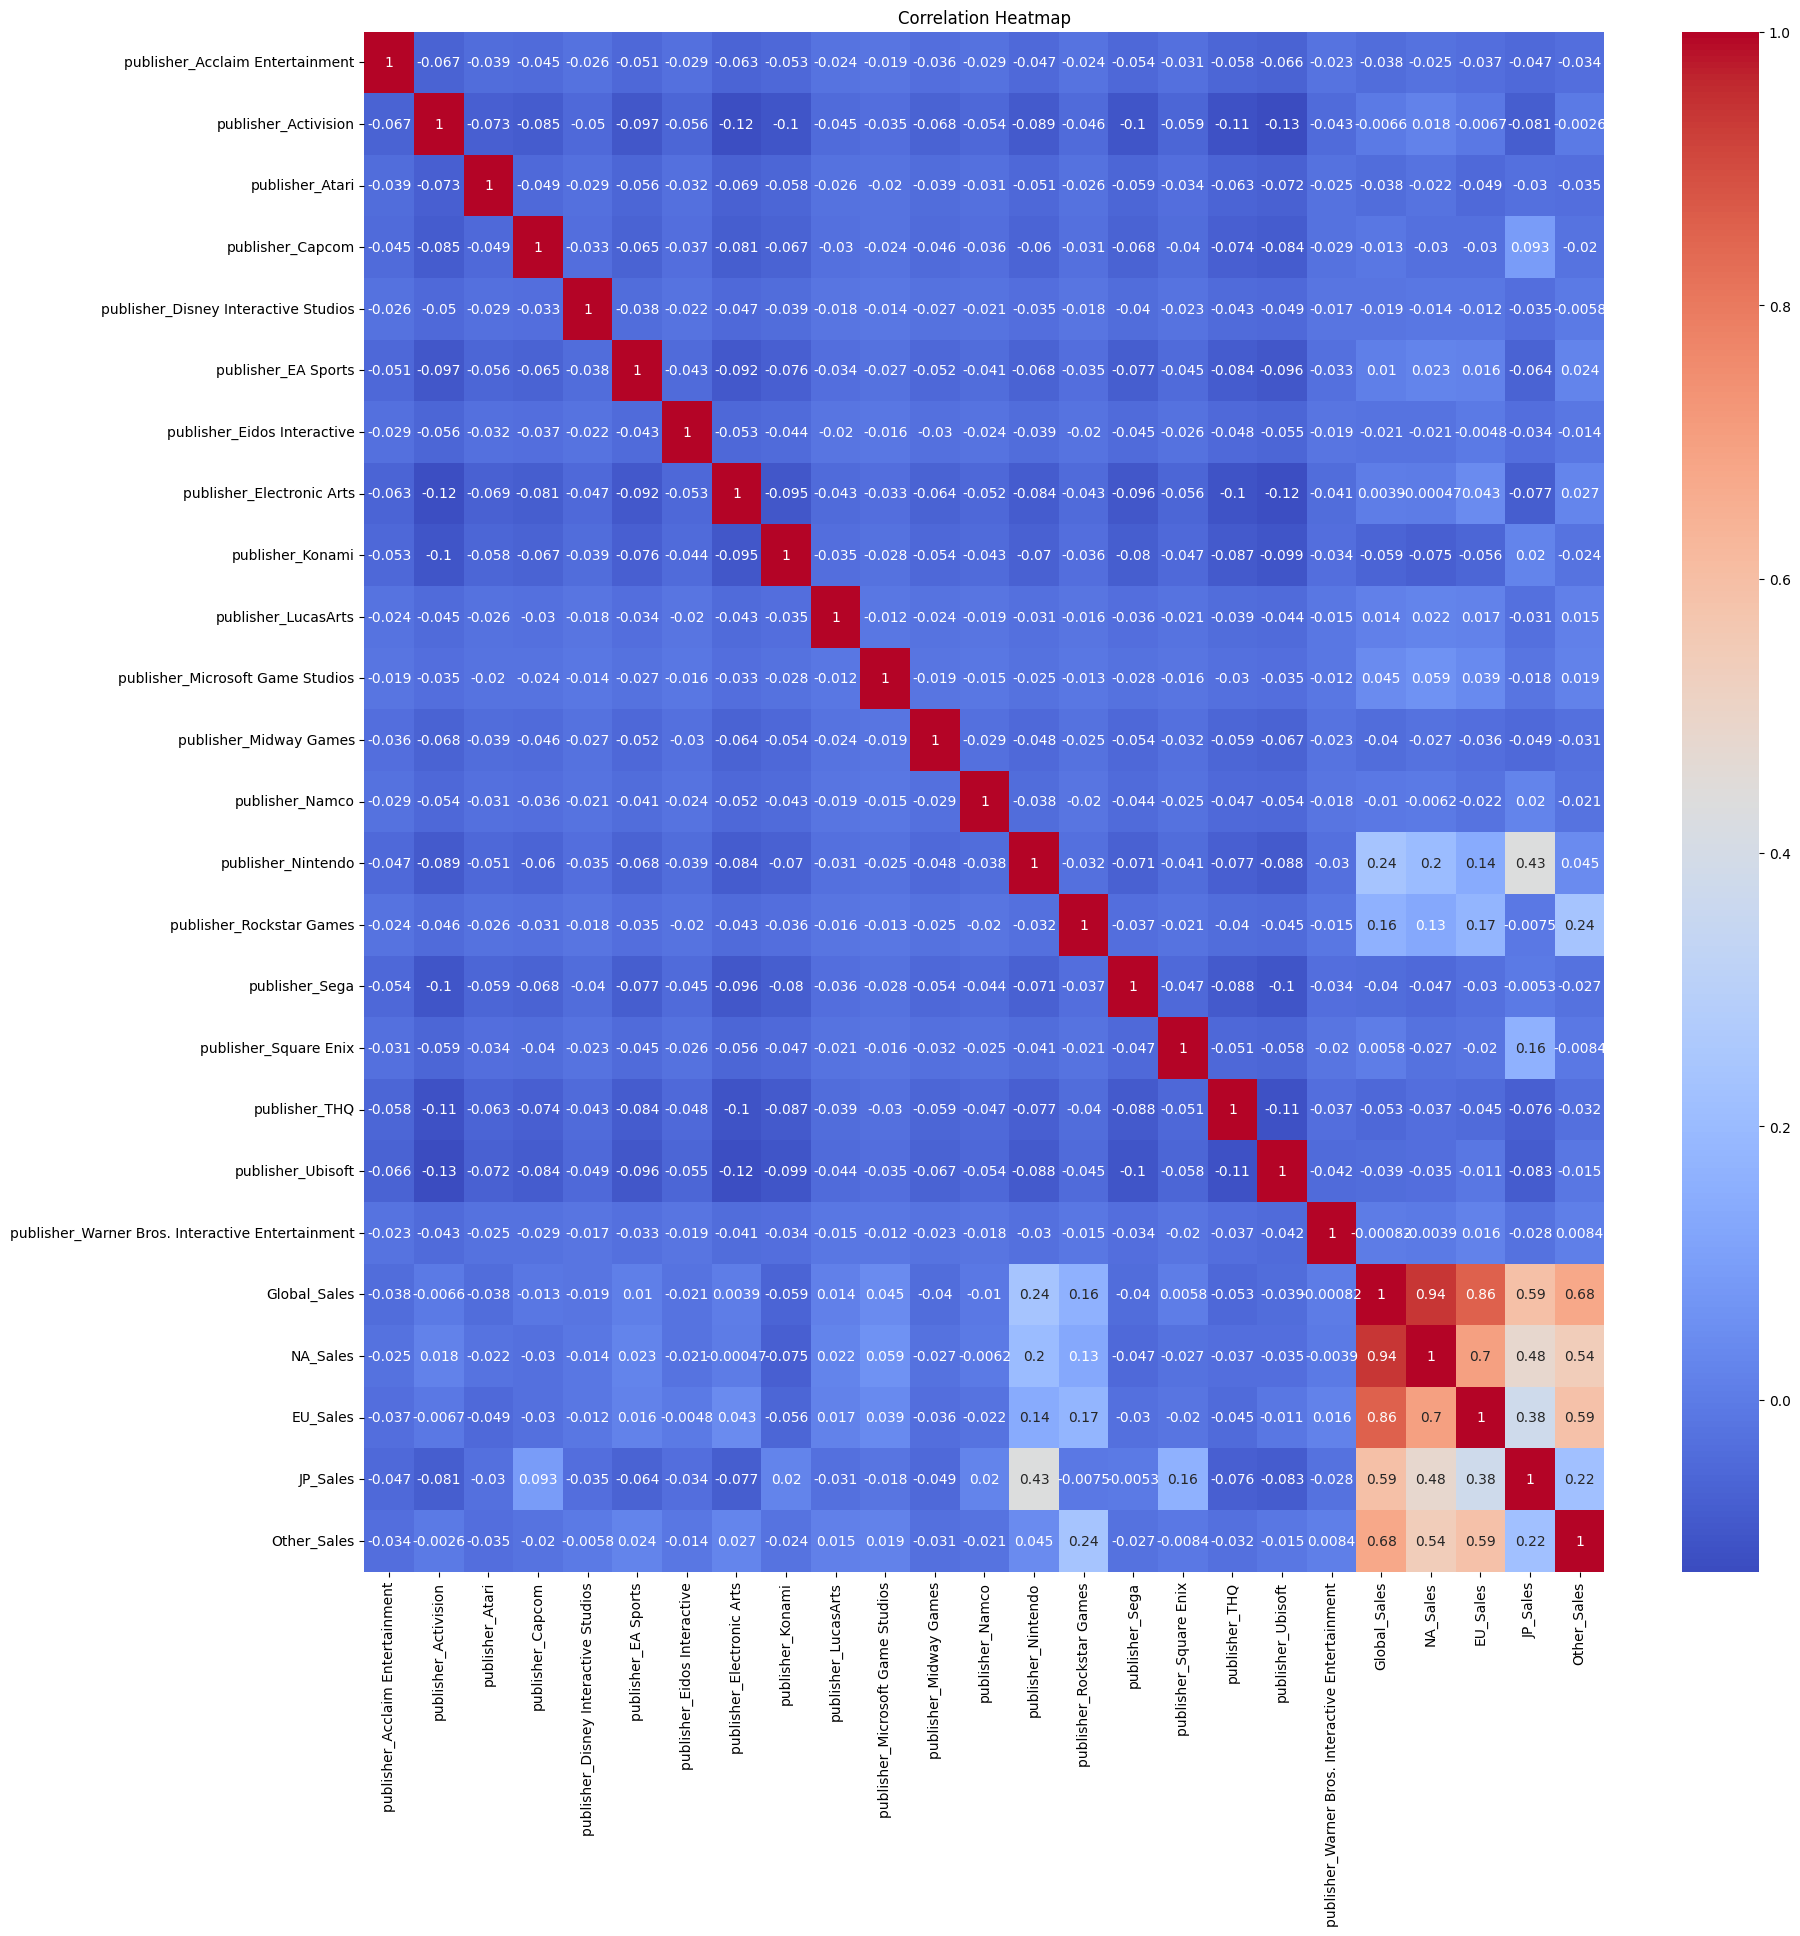

In [144]:
publisher_columns = [col for col in game_stats_encoded.columns if col.startswith('publisher_')]
publisher_sales = game_stats_encoded[publisher_columns+['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
plt.figure(figsize=(20, 20))
sns.heatmap(publisher_sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Looking at relationship between individual publishers and sales, the only publisher with a positive relationship is Nintendo and Japan Sales.

###Genre and Sales

Text(0.5, 1.0, 'Correlation Heatmap')

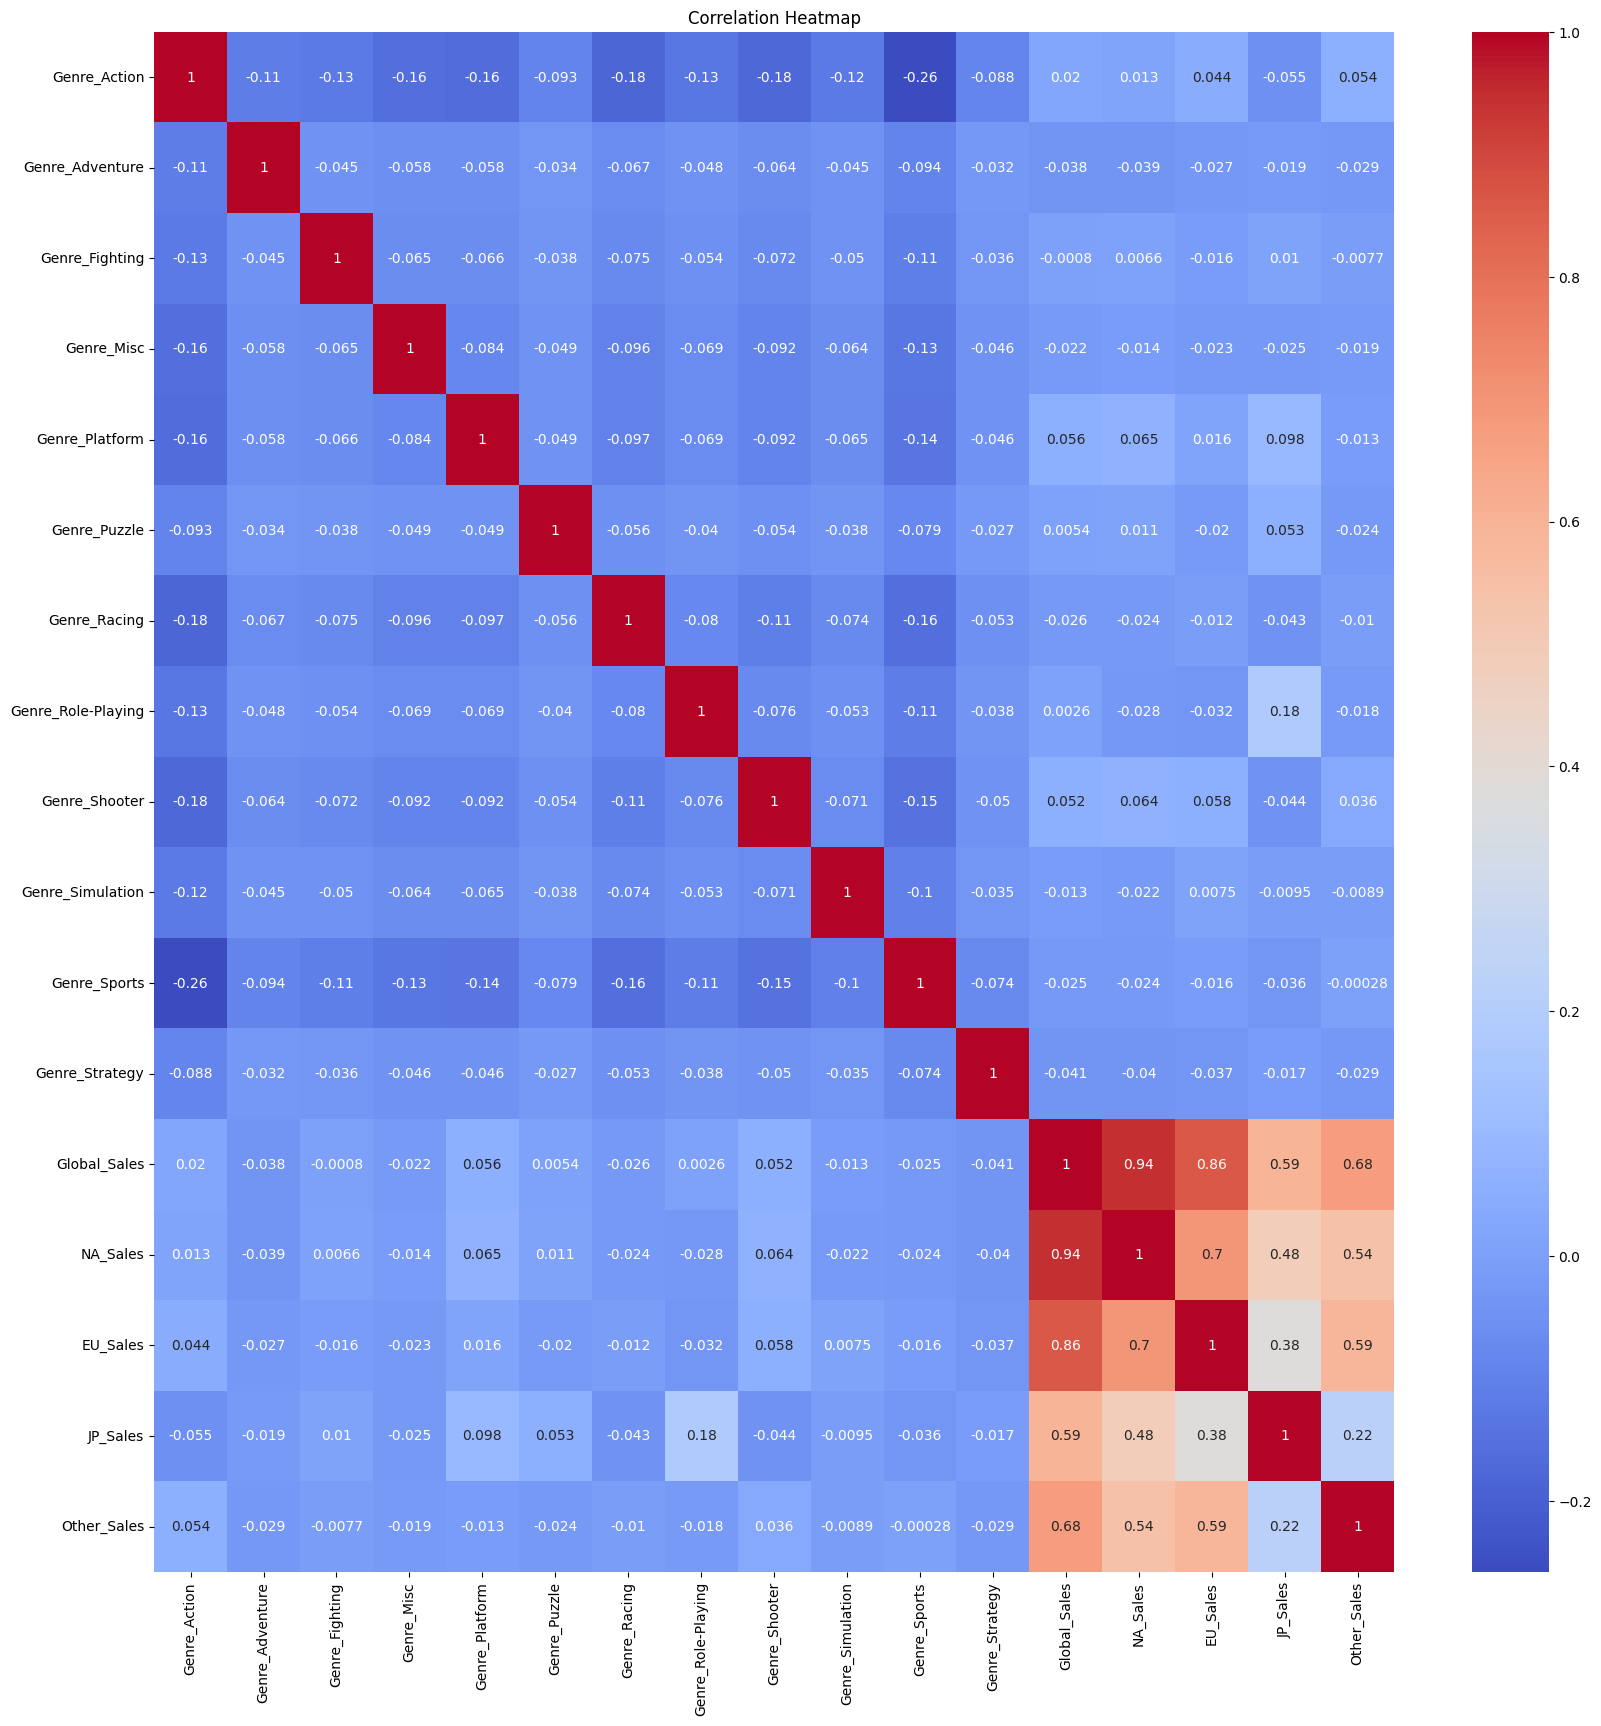

In [145]:
genre_columns = [col for col in game_stats_encoded.columns if col.startswith('Genre_')]

publisher_genre = game_stats_encoded[genre_columns+['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
plt.figure(figsize=(20, 20))
sns.heatmap(publisher_genre.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

There are no significant relationships between Genre and Sales.

###Genre and publisher

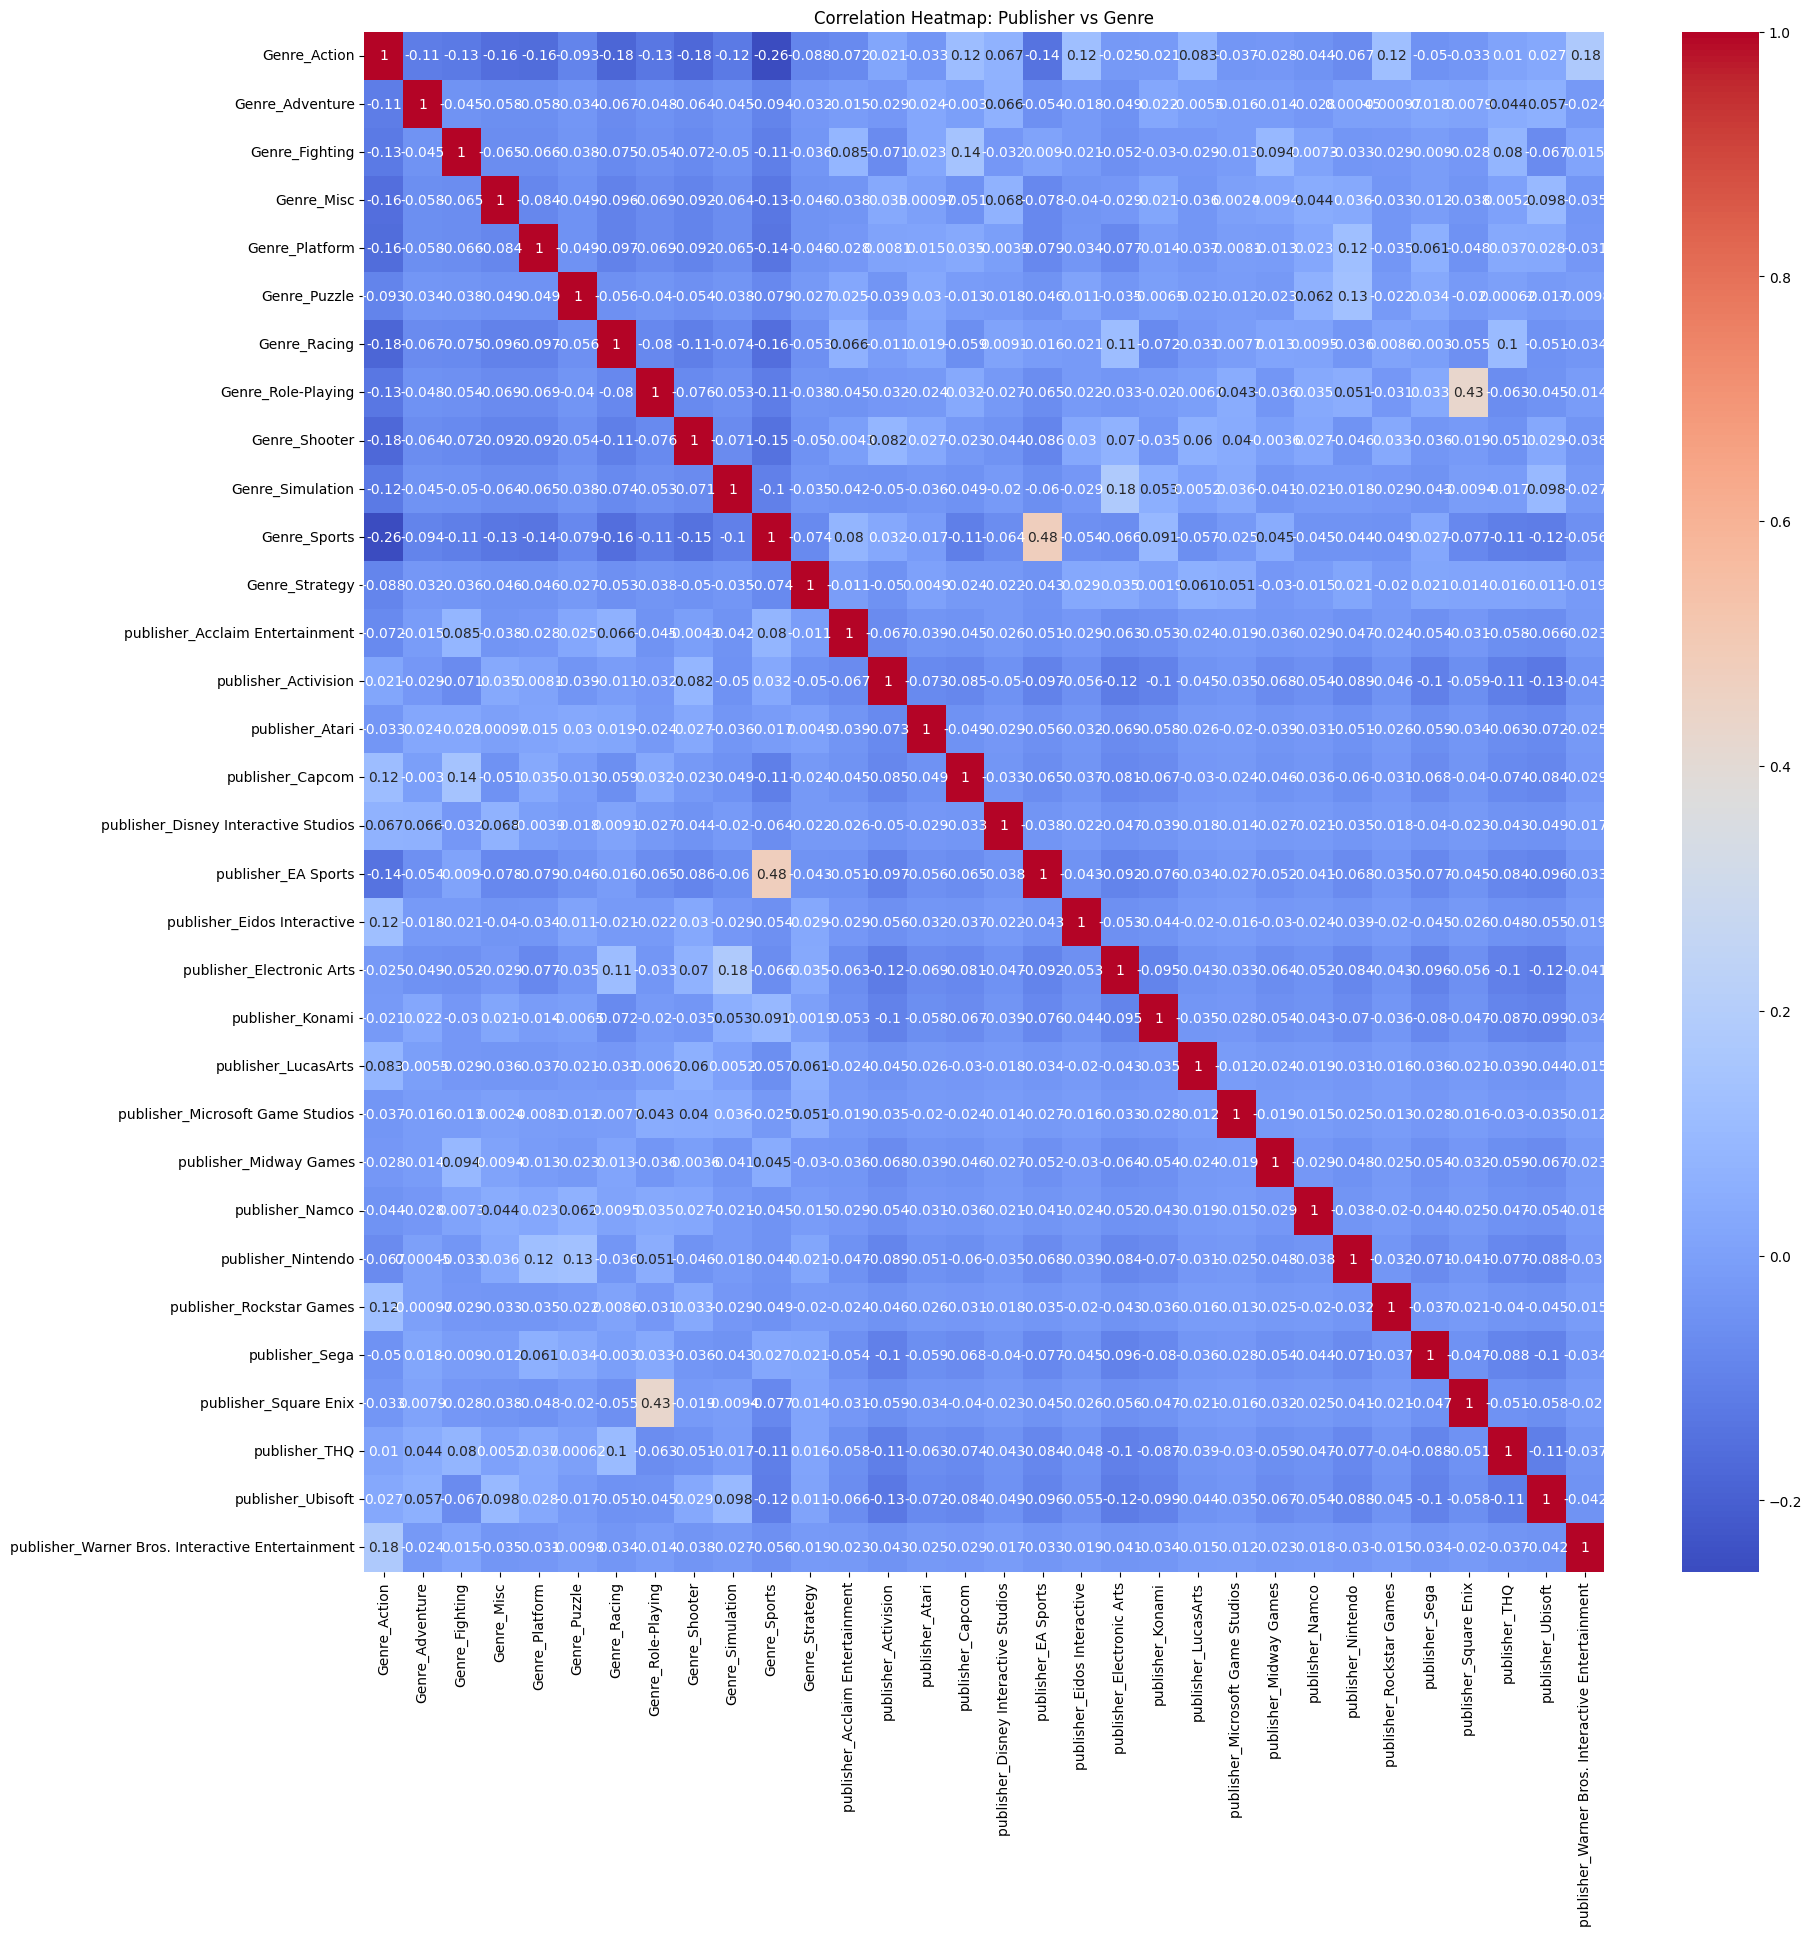

In [146]:
publisher_genre = game_stats_encoded[genre_columns+publisher_columns]
plt.figure(figsize=(20, 20))
sns.heatmap(publisher_genre.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Publisher vs Genre')
plt.show()

Here we can see that 2 publishers tended to publish more of a specific genre:
Square Enix - Role Playing
EA Sports - Sports


###Platforms and sales

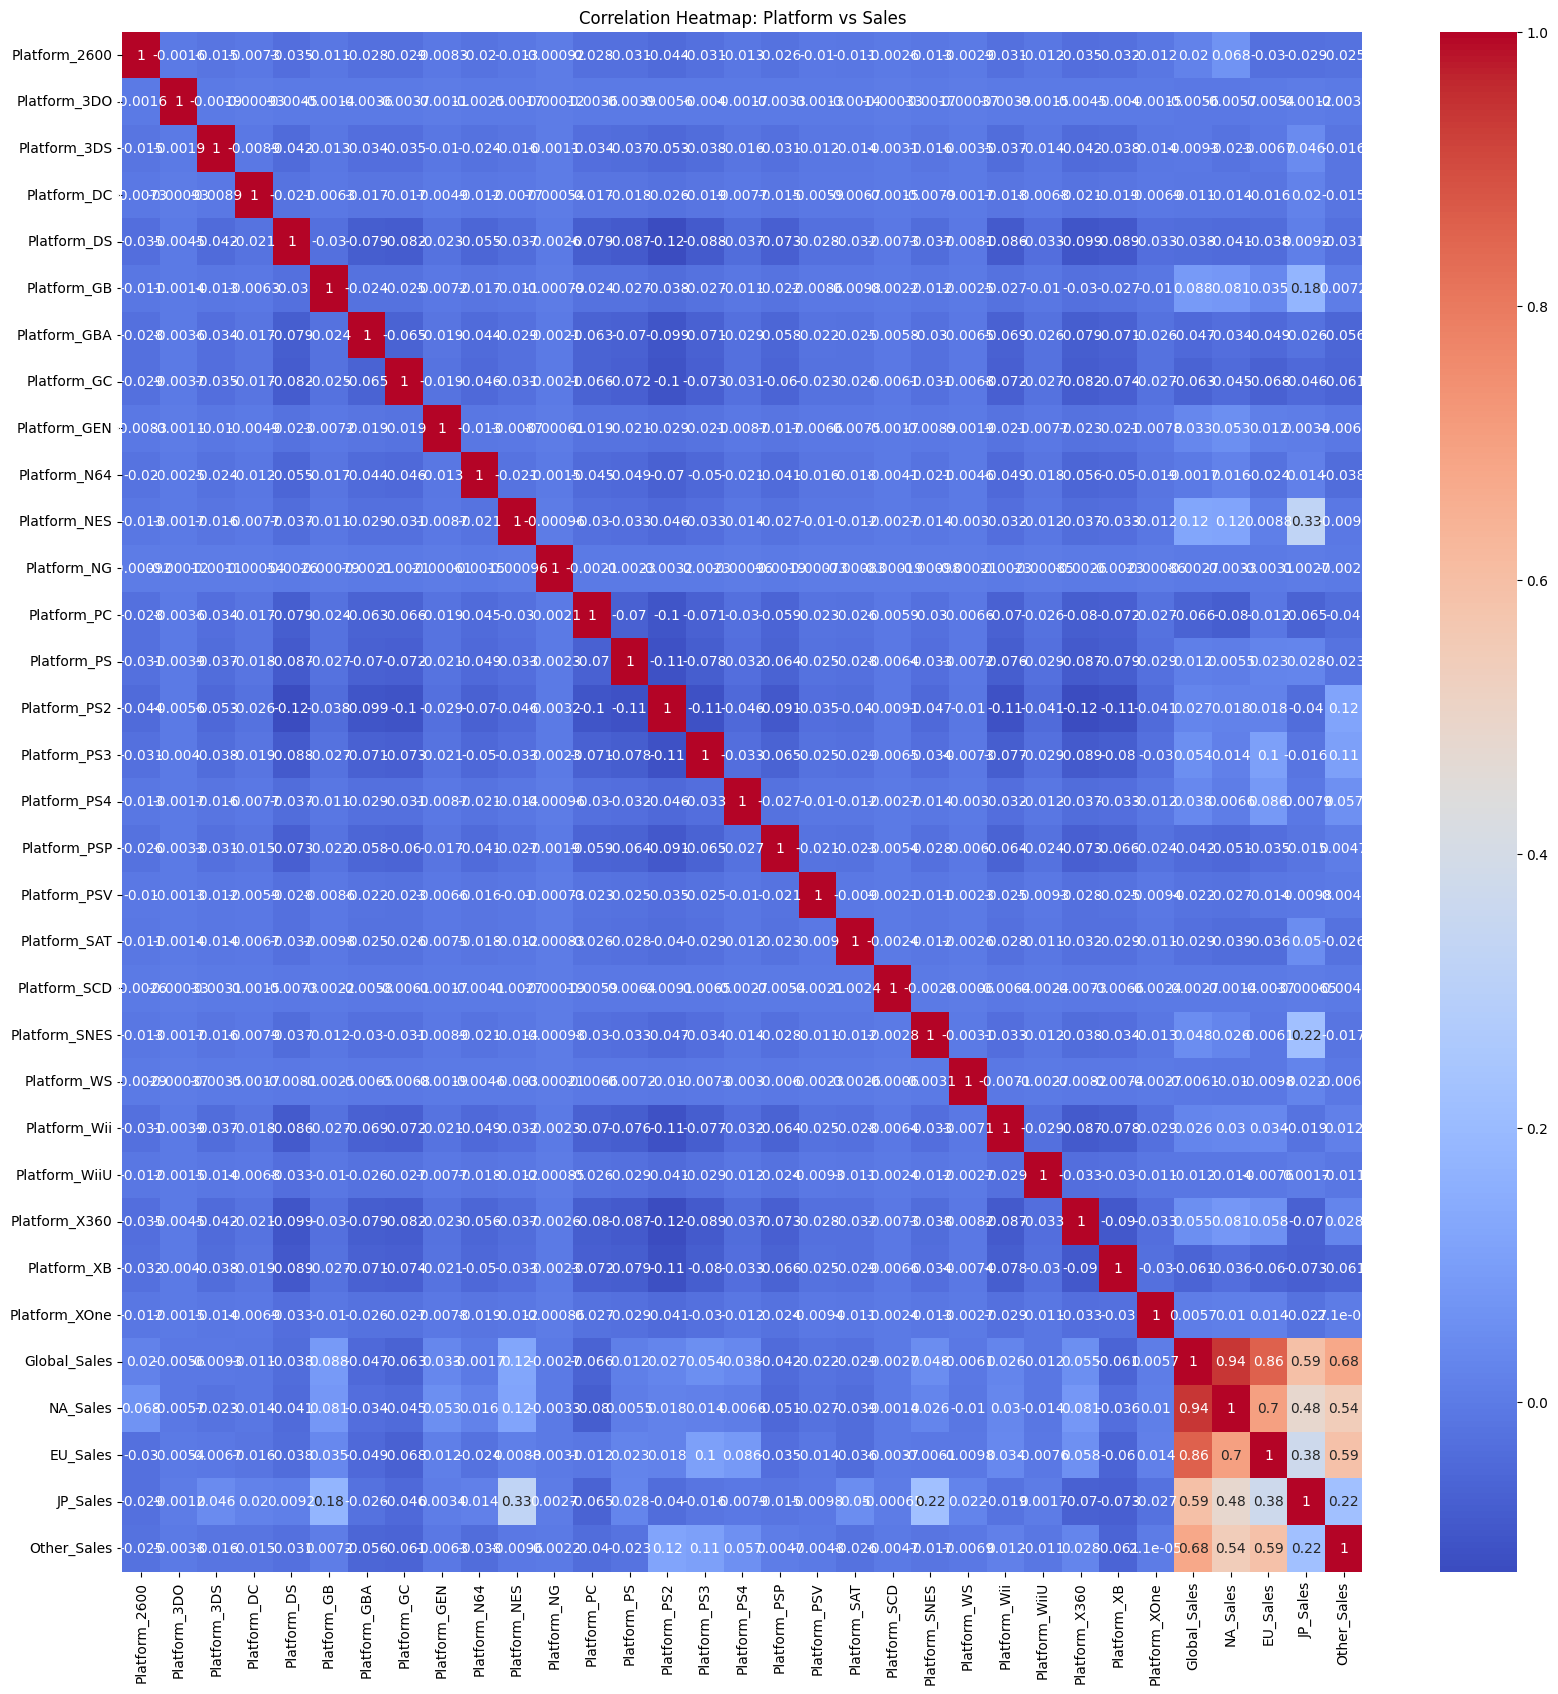

In [147]:
platform_columns = [col for col in game_stats_encoded.columns if col.startswith('Platform_')]


platform_sales = game_stats_encoded[platform_columns+['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
plt.figure(figsize=(20, 20))
sns.heatmap(platform_sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Platform vs Sales')
plt.show()

No platform has a significant relationship to sales except Japan and NES sales.

###Streaming and genre

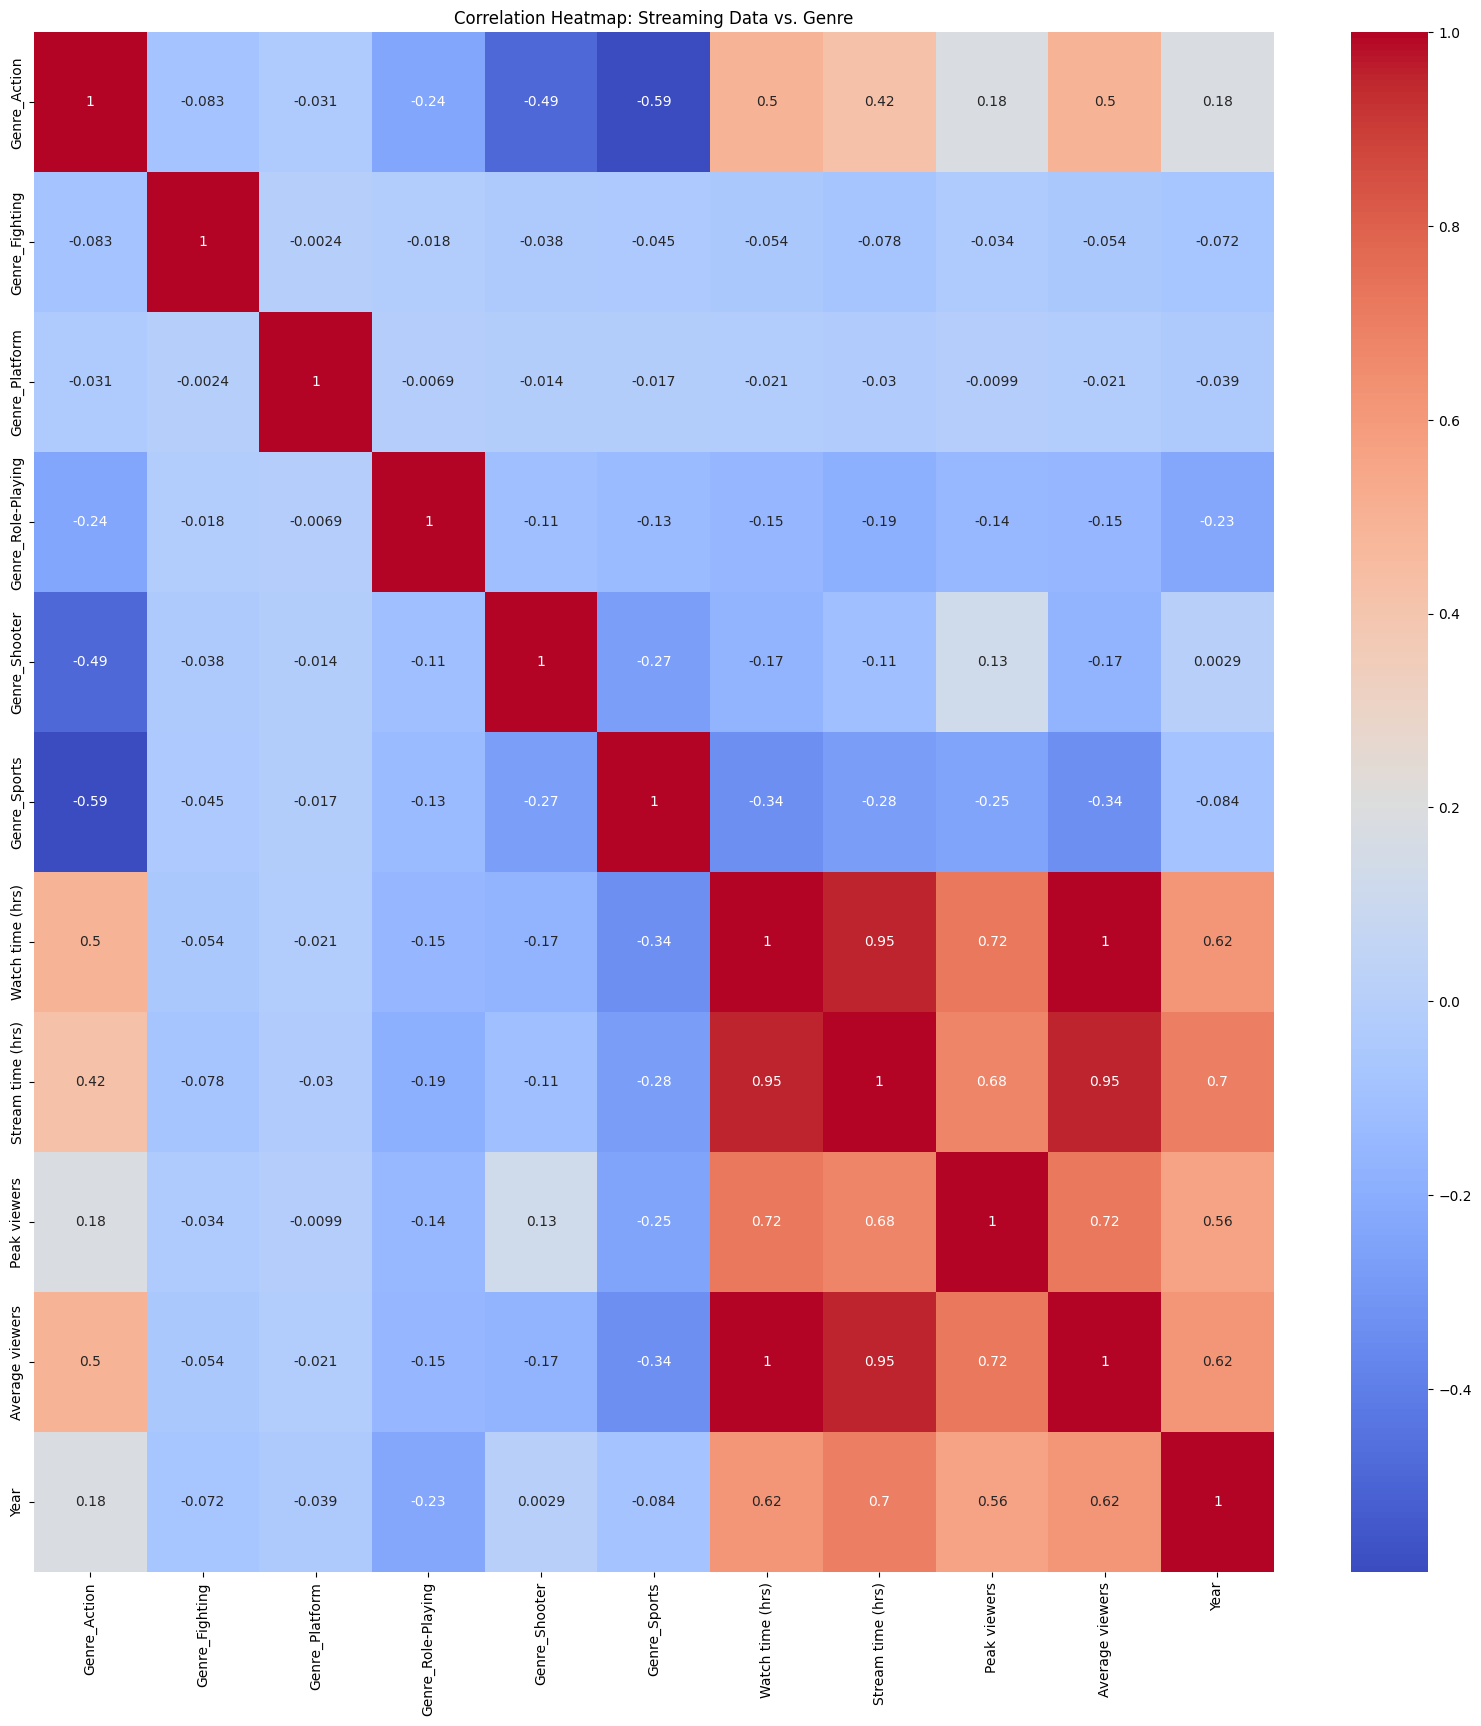

In [156]:
stream_genre = merged_df_encoded[merged_genre_columns + ['Watch time (hrs)', 'Stream time (hrs)', 'Peak viewers', 'Average viewers', 'Year']]
plt.figure(figsize=(20, 20))
sns.heatmap(stream_genre.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Streaming Data vs. Genre')
plt.show()

Here we can see that Action genre has a positive relationship with streaming, ie Action games tend to perform better on streams, particularly with watch time and average viewers.

###Streaming and publishers

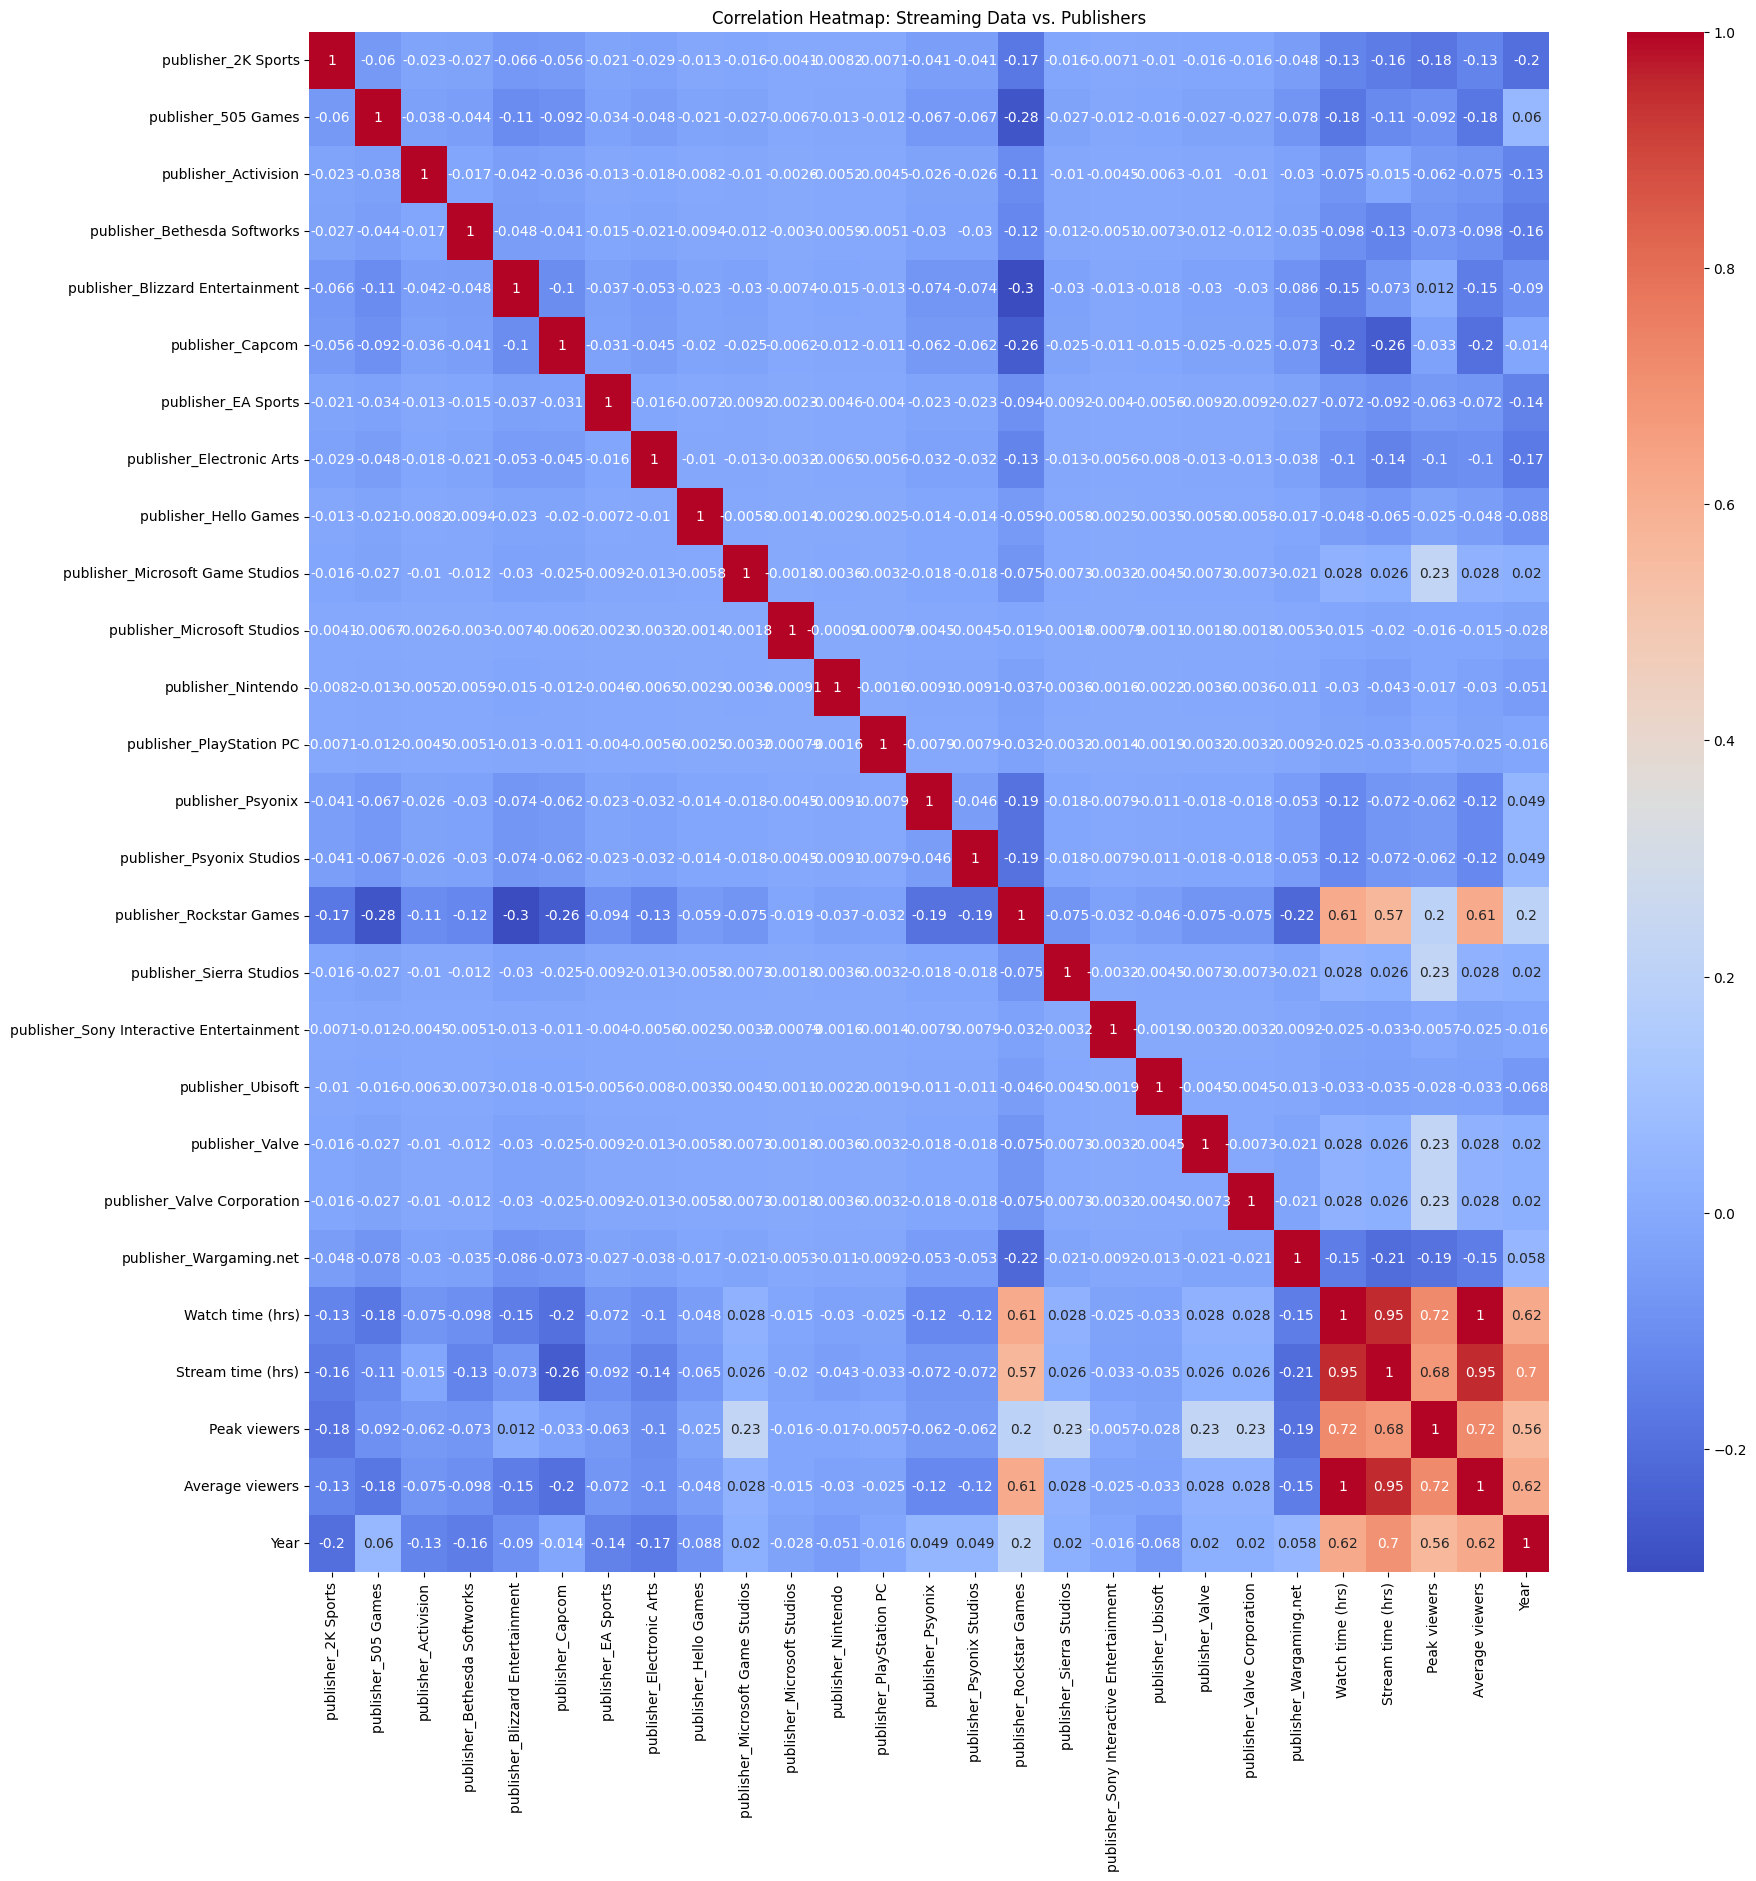

In [157]:
stream_publisher = merged_df_encoded[merged_publisher_columns + ['Watch time (hrs)', 'Stream time (hrs)', 'Peak viewers', 'Average viewers', 'Year']]
plt.figure(figsize=(20, 20))
sns.heatmap(stream_publisher.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Streaming Data vs. Publishers')
plt.show()

Going based on Watch time, Rockstar is the only publisher with a positive correlation. As we saw before, Grand Theft Auto is one of the most streamed games and the correlation could be attributed to it being a very engaging game to watch.

###Streaming and sales

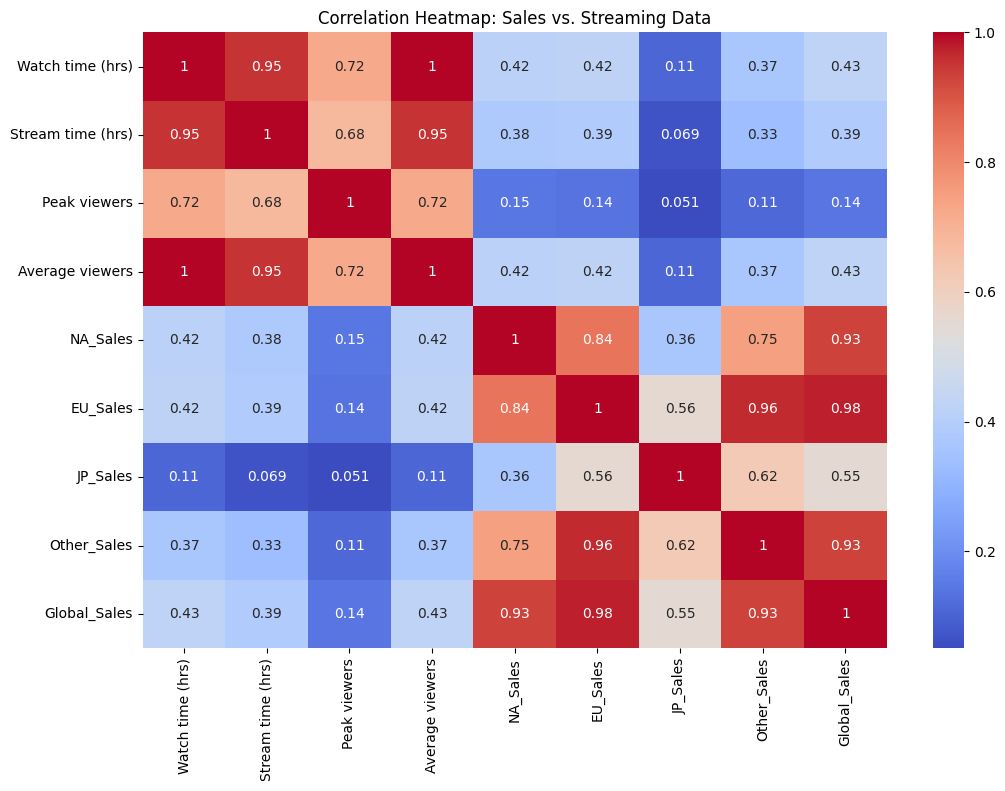

In [158]:
stream_sales = merged_df_encoded[['Watch time (hrs)', 'Stream time (hrs)', 'Peak viewers', 'Average viewers', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plt.figure(figsize=(12, 8))
sns.heatmap(stream_sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Sales vs. Streaming Data')
plt.show()


No notable correlations between game sales and streaming.

###Streaming and reviews

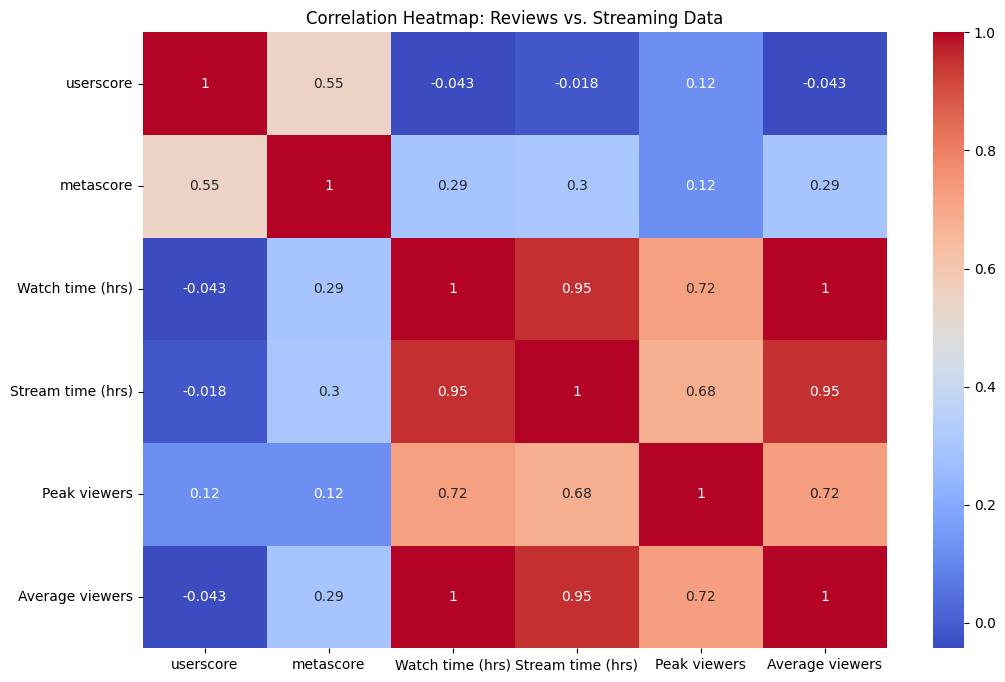

In [159]:
review_streaming = merged_df_encoded[['userscore', 'metascore', 'Watch time (hrs)', 'Stream time (hrs)', 'Peak viewers', 'Average viewers']]

plt.figure(figsize=(12, 8))
sns.heatmap(review_streaming.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Reviews vs. Streaming Data')
plt.show()


Again, no notable correlations.

###Reviews and sales

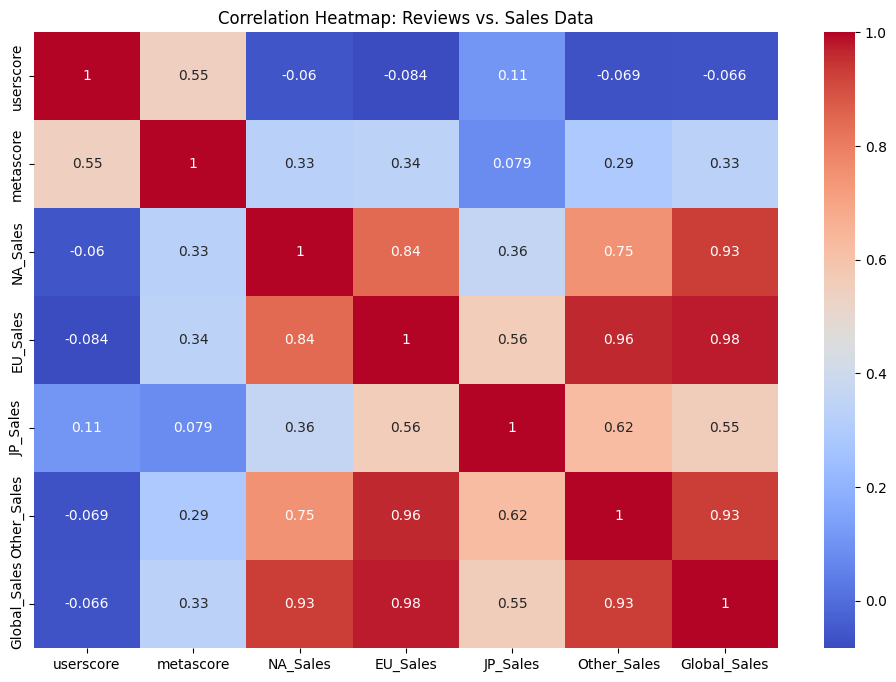

In [160]:
review_sales = merged_df_encoded[['userscore', 'metascore', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

plt.figure(figsize=(12, 8))
sns.heatmap(review_sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Reviews vs. Sales Data')
plt.show()


Surprisingly, there is no apparent correlation between sales and reviews. Perhaps because most reviews come out after the game has been released for some period.

#Stats tests

Before we conduct any tests, we need to see if our data ir normally distributed. This will determine which tests we use.

In [161]:
for column in merged_df.columns:
  if pd.api.types.is_numeric_dtype(merged_df[column]):
    statistic, p_value = shapiro(merged_df[column].dropna())  # Drop NA values for Shapiro-Wilk test
    print(f"Shapiro-Wilk test for {column}:")
    print(f"  Statistic: {statistic}")
    print(f"  P-value: {p_value}")
    if p_value > 0.05:
        print(f"  The data in {column} appears to be normally distributed.")
    else:
        print(f"  The data in {column} does not appear to be normally distributed.")
    print("-" * 20)


Shapiro-Wilk test for Watch time (hrs):
  Statistic: 0.70070476059067
  P-value: 1.3745004274221111e-52
  The data in Watch time (hrs) does not appear to be normally distributed.
--------------------
Shapiro-Wilk test for Stream time (hrs):
  Statistic: 0.7964105507425109
  P-value: 2.8657150280577433e-46
  The data in Stream time (hrs) does not appear to be normally distributed.
--------------------
Shapiro-Wilk test for Peak viewers:
  Statistic: 0.7770487630960463
  P-value: 1.0117538221569743e-47
  The data in Peak viewers does not appear to be normally distributed.
--------------------
Shapiro-Wilk test for Peak channels:
  Statistic: 0.8592068563285331
  P-value: 1.2996979315657071e-40
  The data in Peak channels does not appear to be normally distributed.
--------------------
Shapiro-Wilk test for Streamers:
  Statistic: 0.8877506822964083
  P-value: 2.5057841313979037e-37
  The data in Streamers does not appear to be normally distributed.
--------------------
Shapiro-Wilk test 

Since none of the data is normally distributed, we will use tests that do not assume a normal distribution.

The stats tests I will perform will be to test some of conclusions that I found in the visualisations while other tests will be to confirm or deny the correlations shown in the heatmaps.

###Testing the relationship between PS2 games and publisher success.

In [162]:
from scipy.stats import mannwhitneyu


# Create a new column indicating whether a game was released on PS2
game_stats['Released on PS2'] = game_stats['Platform'] == 'PS2'

# Group by publisher and calculate the total number of PS2 games and total global sales
publisher_stats = game_stats.groupby('publisher').agg({'Released on PS2': 'sum', 'Global_Sales': 'sum'})

# Rename the columns for clarity
publisher_stats = publisher_stats.rename(columns={'Released on PS2': 'Number of PS2 Games', 'Global_Sales': 'Total Global Sales'})

# Separate publishers into two groups: those who released PS2 games and those who didn't.
publishers_with_ps2 = publisher_stats[publisher_stats['Number of PS2 Games'] > 0]['Total Global Sales']
publishers_without_ps2 = publisher_stats[publisher_stats['Number of PS2 Games'] == 0]['Total Global Sales']

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(publishers_with_ps2, publishers_without_ps2, alternative='two-sided')

print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in overall global sales between publishers who released PS2 games and those who did not.")
else:
    print("There is no statistically significant difference in overall global sales between publishers who released PS2 games and those who did not.")


U-statistic: 99251.0
P-value: 2.0057023565986996e-37
There is a statistically significant difference in overall global sales between publishers who released PS2 games and those who did not.


This confirms what we saw earlier and that publishing games on PS2 may have been a factor in a Activision's overall success.

###Relationship between game sales and Watch time on streams

In [163]:



correlation, p_value = spearmanr(merged_df_encoded['Global_Sales'], merged_df_encoded['Watch time (hrs)'])

print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant correlation between game sales and watch time.")
    if correlation > 0:
        print("The correlation is positive, meaning as sales increase, watch time tends to increase.")
    else:
        print("The correlation is negative, meaning as sales increase, watch time tends to decrease.")

    # Interpret the strength of the correlation
    if abs(correlation) < 0.3:
        print("The correlation is weak.")
    elif abs(correlation) < 0.6:
        print("The correlation is moderate.")
    else:
        print("The correlation is strong.")
else:
    print("There is no statistically significant correlation between game sales and watch time.")

Spearman rank correlation coefficient: 0.40275181753939143
P-value: 9.084116759450454e-87
There is a statistically significant correlation between game sales and watch time.
The correlation is positive, meaning as sales increase, watch time tends to increase.
The correlation is moderate.


While there is a relationship between game sales and watch time, since it is only moderate we can conclude that there are other factors at play that determine a game's streaming success.

###Relationshop between Sales across different genres

In [164]:


# Group by genre and prepare data for the Kruskal-Wallis test
groups = merged_df.groupby('Genre')['Global_Sales'].apply(list)

# Perform the Kruskal-Wallis H test
h_statistic, p_value = kruskal(*groups)

print(f"H-statistic: {h_statistic}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in sales across genres.")

        # Interpret the strength of the correlation
    if abs(correlation) < 0.3:
        print("The correlation is weak.")
    elif abs(correlation) < 0.6:
        print("The correlation is moderate.")
    else:
        print("The correlation is strong.")

else:
    print("There is no statistically significant difference in sales across genres.")


H-statistic: 1151.2989484903474, P-value: 1.0383456914427405e-246
There is a statistically significant difference in sales across genres.
The correlation is moderate.


We can conclude that certain genres consistently outperform other genres. This might play a role in publishers determining what games to develop or how to market them.

###Relationship between metascore rating and Watch time on streams

In [165]:
#Categorise the metascore data into bins
bins = [0,60,70,80,90,100]
labels = ['Low','Average','Good','Great','Excellent']
merged_df['metascore_binned'] = pd.cut(merged_df['metascore'], bins=bins, labels=labels)

# Group by metascore bins and prepare data for the Kruskal-Wallis test
groups = merged_df.groupby('metascore_binned')['Watch time (hrs)'].apply(list)

# Perform the Kruskal-Wallis H test
h_statistic, p_value = kruskal(*groups)

print(f"H-statistic: {h_statistic}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in watch hours across metascores.")

        # Interpret the strength of the correlation
    if abs(correlation) < 0.3:
        print("The correlation is weak.")
    elif abs(correlation) < 0.6:
        print("The correlation is moderate.")
    else:
        print("The correlation is strong.")
else:
    print("There is no statistically significant difference in watch hours across metascores.")


H-statistic: 318.44170979142314, P-value: 1.1375758391761997e-67
There is a statistically significant difference in watch hours across metascores.
The correlation is moderate.


<ipython-input-165-c3c170aa988f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = merged_df.groupby('metascore_binned')['Watch time (hrs)'].apply(list)


We can conclude that there is a significant difference in watch hours across metascore categories but, as the correlation is only moderate, we cannot conclude that a high rating will definitely lead to high viewers.

###Relationship between Sales and Metascore rating

In [166]:

corr, p_value = spearmanr(merged_df['Global_Sales'], merged_df['metascore'])
print(f"Spearman Correlation: {corr}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant correlation between sales and metascore.")

    if abs(correlation) < 0.3:
        print("The correlation is weak.")
    elif abs(correlation) < 0.6:
        print("The correlation is moderate.")
    else:
        print("The correlation is strong.")
else:
    print("There is no statistically significant correlation between sales and metascore.")

Spearman Correlation: 0.34671714852195, P-value: 2.6360783398645344e-63
There is a statistically significant correlation between sales and metascore.
The correlation is moderate.


We can conclude that critically acclaimed games tend to have better sales, but other factors like marketing and publisher also play an important role.

In [176]:

# Group by publisher and calculate the total number of games released and total global sales
publisher_stats = game_stats.groupby('publisher').agg({'title': 'count', 'Global_Sales': 'sum'})

# Rename the columns for clarity
publisher_stats = publisher_stats.rename(columns={'title': 'Number of Games Released', 'Global_Sales': 'Total Global Sales'})

# Perform the Spearman rank correlation test
correlation, p_value = spearmanr(publisher_stats['Number of Games Released'], publisher_stats['Total Global Sales'])

print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between the number of games released by a publisher and their total global sales.")
    if correlation > 0:
        print("The correlation is positive, meaning as the number of games released increases, total global sales tend to increase.")
    else:
        print("The correlation is negative, meaning as the number of games released increases, total global sales tend to decrease.")

    # Interpret the strength of the correlation
    if abs(correlation) < 0.3:
        print("The correlation is weak.")
    elif abs(correlation) < 0.6:
        print("The correlation is moderate.")
    else:
        print("The correlation is strong.")
else:
    print("There is no statistically significant correlation between the number of games released by a publisher and their total global sales.")


Spearman rank correlation coefficient: 0.8295449544981266
P-value: 3.145726885415527e-194
There is a statistically significant correlation between the number of games released by a publisher and their total global sales.
The correlation is positive, meaning as the number of games released increases, total global sales tend to increase.
The correlation is strong.


#Conclusion

This analysis into the video game industryhas revealed a complex and dynamic landscape, shaped by technological advancements, changing consumer preferences, and the rise of new platforms.

Our analysis of publishers showed that while quantity doesn't always equate to quality, it can certainly help. Sega topped the charts in terms of the number of games published, but Nintendo emerged as the revenue leader, demonstrating that a focused strategy on high-quality, franchise-building games can lead to substantial financial success. The case of Rockstar Games with Grand Theft Auto V further emphasizes that a single blockbuster title can significantly impact a publisher's standing.

The evolution of gaming platforms painted an interesting picture. The PlayStation 2's dominance in terms of the number of games published aligns with its status as the best-selling console of all time. This success likely contributed to the overall performance of publishers who heavily invested in PS2 games, as our statistical analysis confirmed.

When it comes to game performance, we saw that action games consistently led the pack both in terms of volume and sales. However, the landscape is far from static. The rise of genres like shooters and RPGs in the early 2000s reflects the industry's ability to adapt to new technologies and changing player preferences.

Our examination of sales trends revealed the outsized impact of certain games, with Wii Sports in 2006 standing out as a particular phenomenon. The regional breakdown of sales highlighted the continued dominance of the North American market, followed by Europe, with Japan and other regions showing similar, smaller market shares.

The analysis of game ratings unveiled some intriguing patterns. The divergence between critic scores (metascores) and user scores over time points to a growing disconnect between professional reviewers and the gaming public. This could be due to factors like changing expectations, franchise fatigue, or even controversies surrounding game studios.

Perhaps one of the most surprising findings came from our look at game streaming data. The disconnect between top-selling games and most-streamed games, exemplified by the continued dominance of League of Legends in streaming despite its 2009 release date, highlights the unique dynamics of the streaming ecosystem. It suggests that a game's streaming success is not necessarily tied to its commercial performance or recency.

Our correlation analyses and statistical tests further reinforced these insights. We found that while there are relationships between factors like sales and ratings, or sales and streaming metrics, these correlations are often moderate at best. This underscores the multifaceted nature of success in the gaming industry – a hit game needs more than just good reviews or high stream numbers to achieve commercial success.

In conclusion, this analysis has shown that the video game industry is a complex ecosystem where success is determined by a myriad of factors. From the rise of certain genres to the impact of specific consoles, from the divergence of critic and user opinions to the unique world of game streaming, the industry continues to evolve in fascinating ways. As we look to the future, it's clear that understanding these dynamics will be crucial for publishers, developers, and analysts alike in navigating the ever-changing landscape of video games.